# Multi-Style Neural Transfer for Artistic Education

## <i> Where Art and NST meets </i>

**Author:** Nicole Loy Yan Tong

**Student Number:** 230655197

**Platform:** Jupyter Notebook (PyTorch-based Implementation)

## 1. Introduction

Welcome to my Neural Style Transfer (NST) portfolio - a <b>creative and interactive space </b> where art and artificial intelligence comes together.

Whether you're an art teacher, a student, a machine learning enthusiasts, or just curious about how different art styles can interact with technology, this notebook is designed for you.

Neural Style Transfer is a fascinating deep learning technique that lets you blend the content of one image, like a photograph - with the style of another - such as a famous painting, resulting in a whole new artistic creation. Imagine taking a photo of your city skyline and reimagining it in Van Gogh's swirling brushstrokes. Pretty cool, right? This concept was first introduced by Gatys, Ecker, and Bethge (2016), who demonstrated how Convolutional Neutral Networks (CNNs) can seperate and recombine the "content" (the main shapes and structure) and "style" (colours, textures and patterns) of any two images (Gatys et al., 2016; Jing et al., 2020). 

This portfolio is all about hands-on learning and accessibility:
- **Art teachers** will find ready-to-use examples and activities that bring AI-driven creativity into classrooms, sparking conversations on how technology can enahnce and reinterpret artistic traditions.
- **Art students** can experiment with their own images and styles - no coding needed! This is a chance to learn both the technical and expressive sides of digital art-making.
- **Anyone interested in art styles and interactivity** can play, remix and discover how different combinations of contents and style produce unique results - making art history interactive and fun!
- **Machine learning enthusiasts** will enjoy clear explanations of how CNNs power NST, along with opportunities to tweak parameters, explore code and see deep learning's creative potential firsthand.
- **Educators and learners bridging AI and art history** can use this notebook to explore how algorithms can help us understand and reimagine the visual language of different eras and movements. It's a way to make art more accessible and engaging for everyone.

Throughout this journey, you'll find:
- Easy-to-understand explanations of how NST works, with references to key research.
- Interactive code cells and visual examples you can adapt for your own projects.
- A showcase of stylised images that highlight the creative possibilities of neural networks.

Whether you are here to teach, learn experiment or simply enjoy the fusion of art and technology, this portfolio is your gateway to exploring how AI can transform the way we create and experience visual art.

## 2. Load Content and Style Images

In this section, we will introduce utility functions that will allow us to easily load and display our chosen images for style transfer process. We begin by selection a content image, which serves as the base for our artistic transformation. Alongside this, we prepare <b>six style images - three inspired by Monet and three inpsired by Van Gogh </b> - to demonstrate the versatility of neural style transfer across different artistic styles.

These functions will help us visualise both the original content image and the selected style images, making it easier to compare results and appreciate the unique characteristics each style brings to the final output. By establishing a clear workflow for loading and displaying images, we set the foundation for the creative experiments that follow.

### 2.1 Setting the Device & Preparing the Images

In [1]:
%matplotlib inline

import torch                                  # For PyTorch tensor operations
from PIL import Image                         # For image file handling
import torchvision.transforms as transforms   # For preprocessing
import matplotlib.pyplot as plt               # For image display
from torchvision.utils import save_image
import os

In [2]:
# Select the computing device
# Use GPU (cuda) if available, else fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the image size to resize all content and style images
# VGG-19 (used later) expects uniform input sizes
# You can increase to 512 for higher quality (slower processing)
# Current image size is 256
image_size = 256

# Define a sequence of transformations to prepare images for the NST model
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),     # Resize image to fixed dimensions
    transforms.ToTensor(),                           # Convert image to PyTorch tensor (values 0–1)
    transforms.Lambda(lambda x: x[:3, :, :]),        # Remove alpha channel (keep only RGB)
    transforms.Normalize(                            # Normalize using ImageNet's mean and std dev
        mean=[0.485, 0.456, 0.406],                  # These match the VGG model's training distribution
        std=[0.229, 0.224, 0.225]
    )
])

# Verify if its working
print("Device in use:", device)
print("Transform pipeline ready.")

Device in use: cpu
Transform pipeline ready.


To begin the neural style transfer process, we first configure the system to
use either a GPU or CPU, depending on hardware availability. This is done
using `torch.cuda.is_available()`, ensuring the computation is optimised
for speed if a GPU is present. We also standardise the image size to
256×256 pixels. This resolution is a practical balance between performance
and visual quality. Larger image sizes can yield finer results but may
consume significantly more memory and computation time, which could
crash the notebook on some systems.

Next, we define a transformation pipeline that automatically resizes each
image, converts it to a PyTorch tensor, which is the data format used by
neural networks, and normalises its color values. The normalisation is
based on the ImageNet dataset’s mean and standard deviation values, which
helps the <b>pre-trained VGG-19 model better interpret</b> the input image since it was originally trained on ImageNet data (He et al., 2016).

### 2.2 Loading and Displaying Images

In [3]:
# Function to load an image from the given file path and apply the transform
def load_image(path):
    image = Image.open(path).convert("RGB")           # Open image and convert to RGB format
    image = transform(image).unsqueeze(0).to(device)  # Apply transform, add batch dim, send to device
    return image                                      # Return as a torch tensor

A helper function`load_image(path)` is introduced to handle this preprocessing. It reads an image from the provided path using PIL, resizes and transforms it using the defined pipeline. It then addes a batch dimension as required by PyTorch models and sends it to the selected device (GPU or CPU). This function is consistent throughout the notebook to prepare all content and style images before feeding them to the model.

### 2.3 Load Content and Style Images

<b>Content Image using:</b>
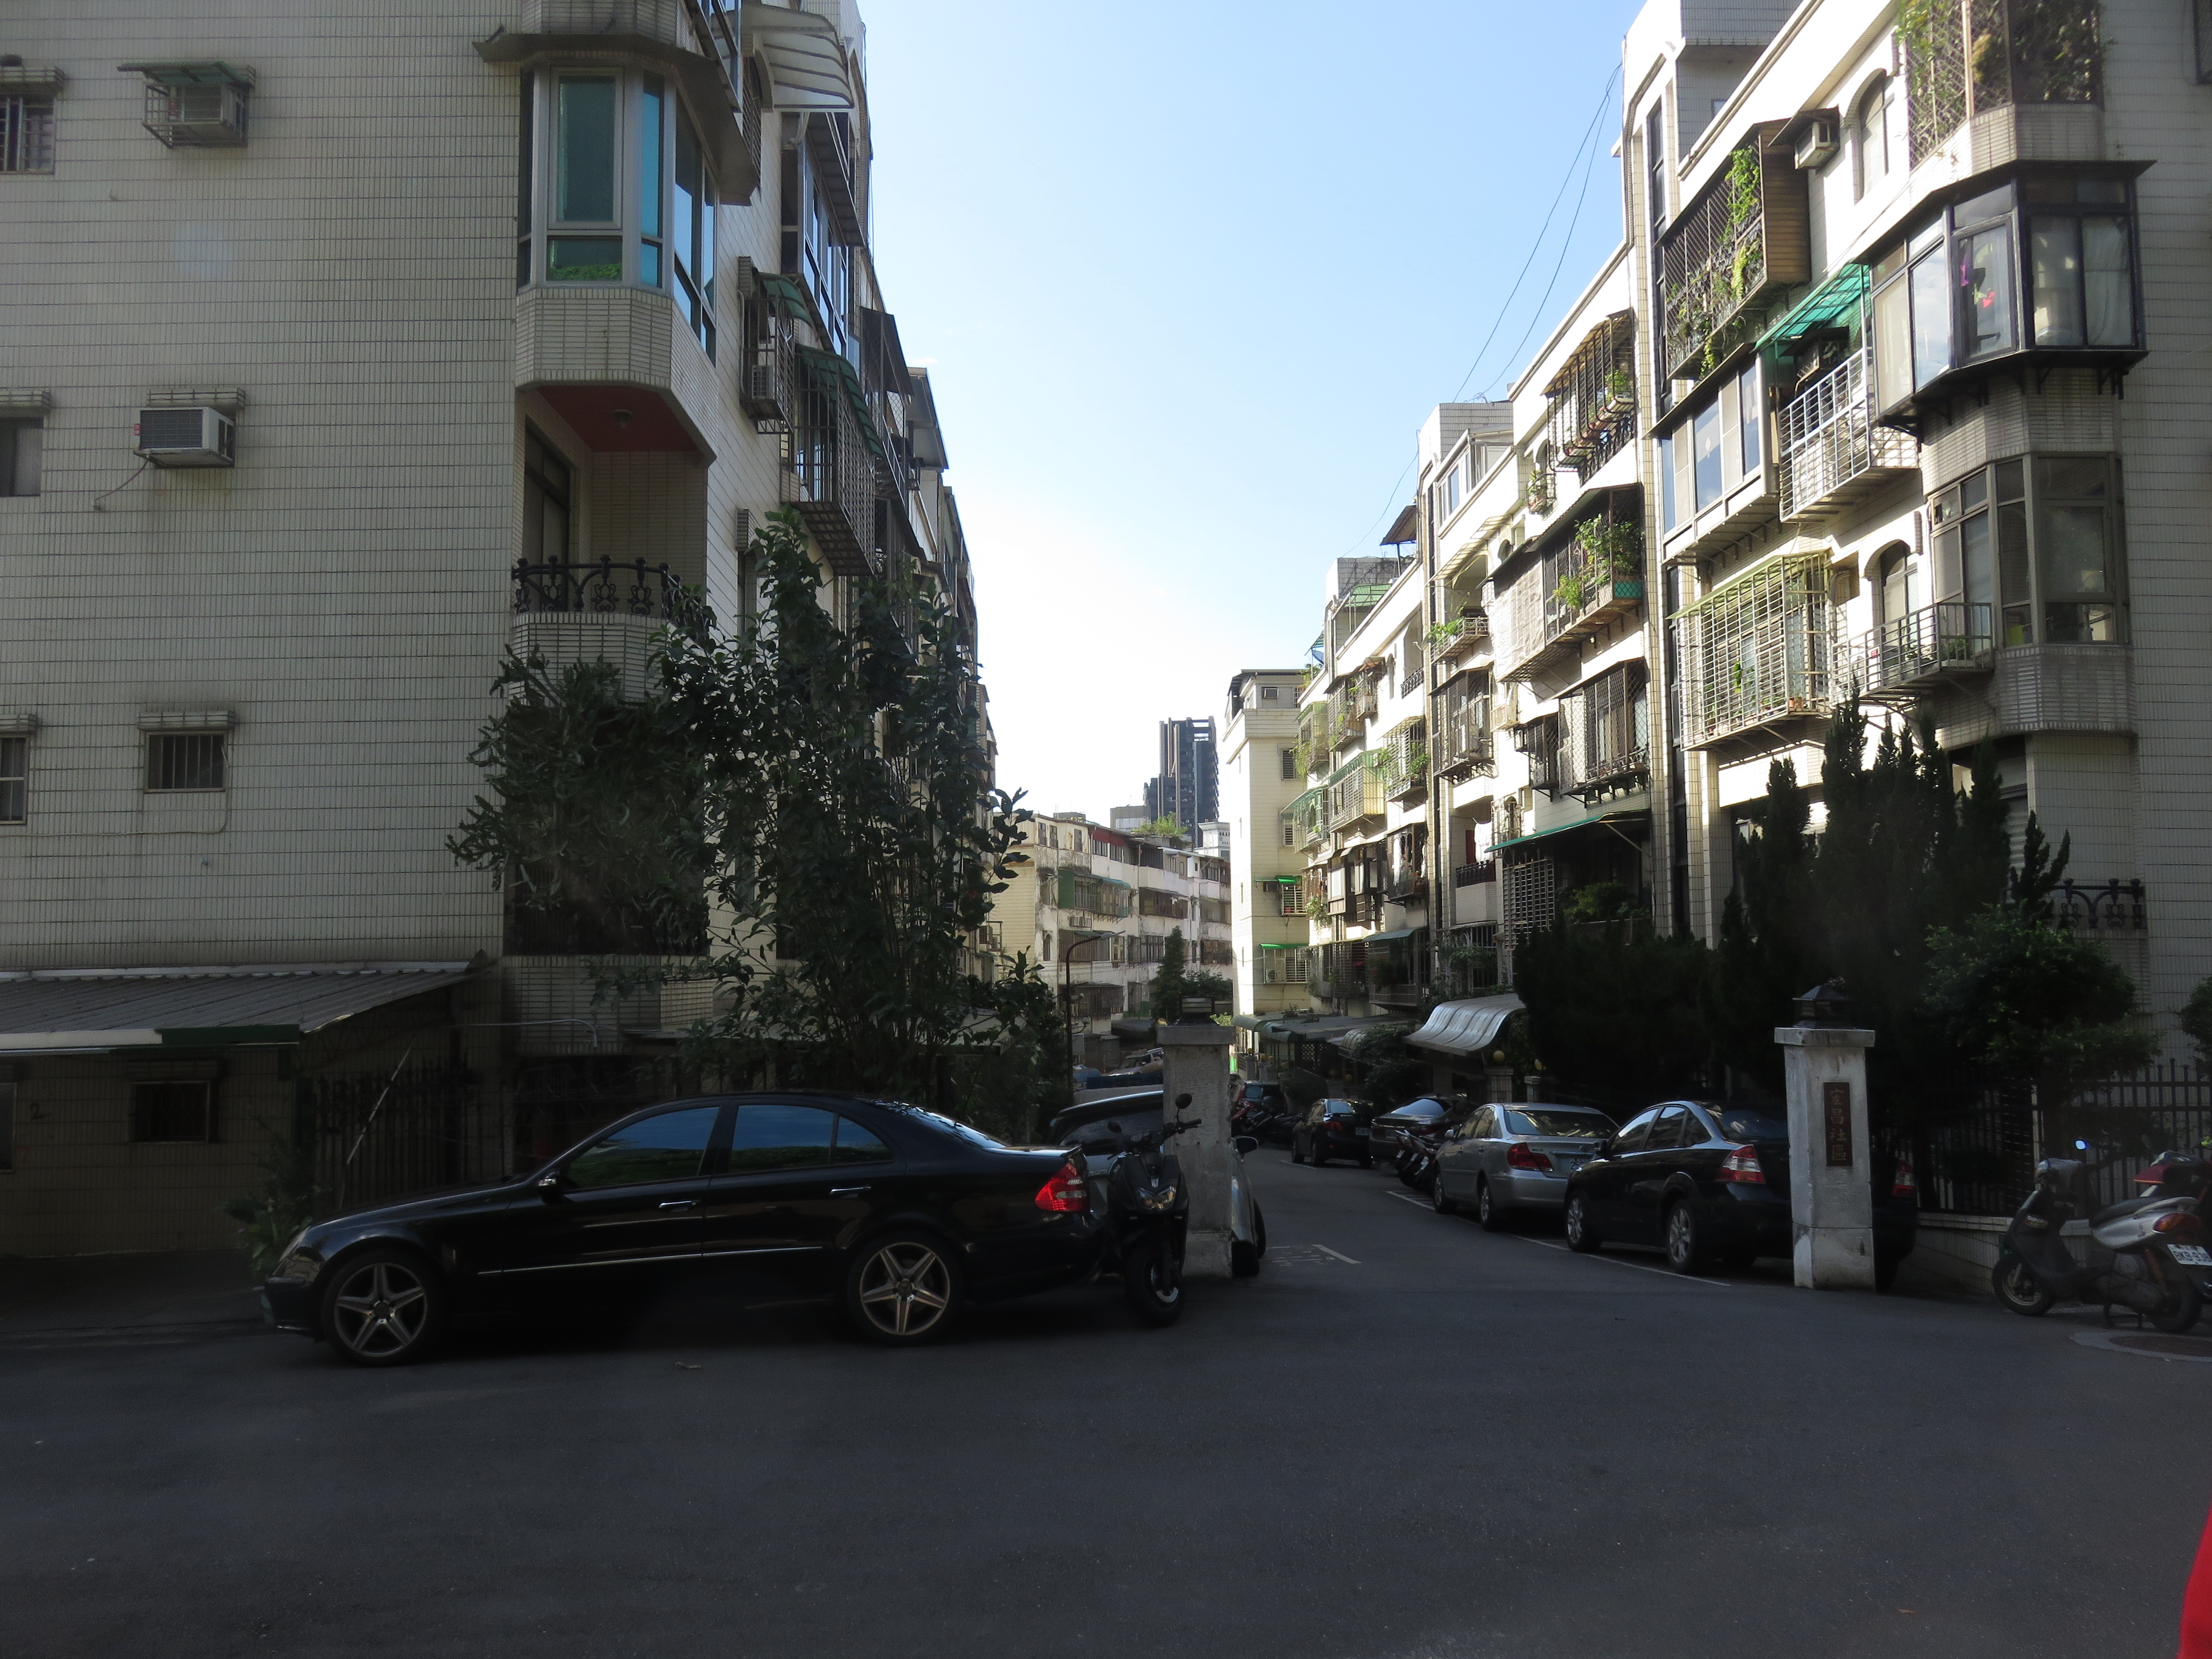 <br>
<b>Figure 1:</b> Content image taiwancity.jpg was taken by me during my trip.


<b>Style Images Using:</b>
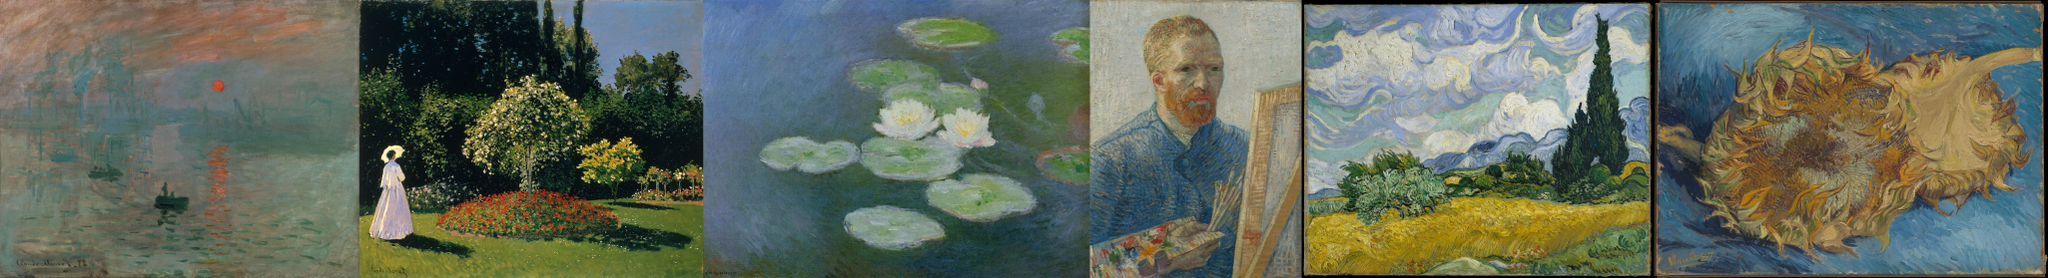

<b>Figure 2: </b> Monet, C. (1872). Impression, Sunrise<br>
<b>Figure 3: </b> Monet, C. (1867). Jeanne-Marguerite Lecadre in the Garden Sainte-Adresse<br>
<b>Figure 4: </b> Monet, C. (1899). Water Lilies, Evening Effect<br>
<b>Figure 5: </b> Van Gogh, V. (1887–1888). Self-Portrait as a Painter<br>
<b>Figure 6: </b> Van Gogh, V. (1889). Wheat Field with Cypresses<br>
<b>Figure 7: </b> Van Gogh, V. (1887). Sunflowers<br>

In [4]:
# Load content image
content_image = load_image("content_images/taiwancity.JPG")

# Style image paths
style_paths = [
    "style_images/monet1.jpg",
    "style_images/monet2.jpg",
    "style_images/monet3.jpg",
    "style_images/vangogh1.jpg",
    "style_images/vangogh2.jpg",
    "style_images/vangogh3.jpg"
]

# Load style images
style_images = [load_image(p) for p in style_paths]

#Save outputs to verify visually
os.makedirs("previews", exist_ok=True)

save_image(content_image, "previews/content_preview.jpg")
save_image(style_images[0], "previews/style1_preview.jpg")

print("Images saved to 'previews/' folder for manual viewing.")

Images saved to 'previews/' folder for manual viewing.


Following this, the cell loads the content image (the image we want to stylize) and the six artistic reference images (three from Claude Monet and three from Vincent van Gogh). The paths to these images are specified relative to the notebook file, and each image is loaded and transformed using the `load_image()` function.

To verify that the images have loaded correctly without crashing the notebook (which can happen on some systems when using inline plots), we save preview versions of the images to a previews/ folder. This way, you can view the content and style images manually using your file browser or image viewer, without depending on Jupyter Notebook to render them inline.

This setup lays the foundation for creative experimentation by ensuring all
images are correctly formatted and accessible for the style transfer process.

<b> Images saved to previews folder: </b> <br>
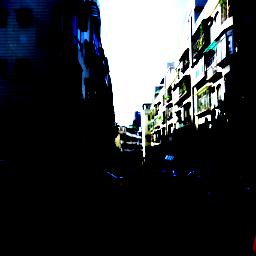 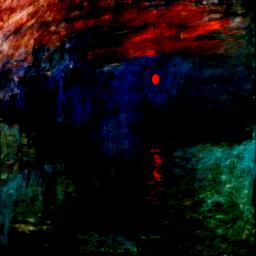

<b>Figure 8:</b> content_preview.jpg <br>
<b>Figure 9:</b> style1_preview.jpg

## 3. Feature Extraction Setup with VGG19 Model

In this section, we prepare the system to extract visual features from both the content image and the chosen style image using a pretrained VGG19 convolution neural network.

VGG19 is a popular deep learning model trained on millions of natural images (He et al., 2016), and it is especially good at capturing different levels of visual patterns — from simple edges to complex textures.

### 3.1 Load Pretrained VGG19 Model
Firstly, we'll load the VGG19 convolutional neural network from `torchvision.models`as a feature extractor. This model was originally trained on the ImageNet dataset (He et al., 2016), which means it has learned to detect useful visual features like edges, shapes and textures.

For style transfer, we only use the feature extraction part (i.e., the convolutional layers), and freeze its parameters to prevent it from updating during training. This allows us to extract consistent feature representations of both content and style images (Gatys et al., 2016).

In [5]:
# Load Pretrained VGG19 and Freeze Parameters
from torchvision.models import vgg19, VGG19_Weights
import torch.nn as nn

# Use recommended weight loading method
weights = VGG19_Weights.DEFAULT
vgg = vgg19(weights=weights).features.to(device).eval()

# Freeze all VGG parameters (we don’t train the model itself)
for param in vgg.parameters():
    param.requires_grad_(False)

### 3.2  Feature Extraction and Style Representation
Here, we'll define the layers of VGG19 we’ll use to extract content and style features. Following the approach by Gatys et al. (2016), we use the `conv4_2` layer to represent the content of an image, and layers like `conv1_1`, `conv2_1`, etc., to capture style.

We also define a function to compute a Gram matrix, which measures the correlations between feature maps and is commonly used to represent texture and style in an image.

In [6]:
# Define Layers to Use
# Content from conv4_2, Style from conv1_1, conv2_1, conv3_1, conv4_1, conv5_1
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

# Utility to extract selected features
def get_features(image, model, layers=None):
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if layers and name in layers:
            features[name] = x
    return features

# Gram Matrix for Style Loss
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    tensor = tensor.view(c, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

## 4. Stylisation Process and Optimisation

Now that we have extracted the necessary features from the content and style images above, it's time to perform the actual neural style transfer.

In this section, we create a copy of the content image (Figure 1, taiwancity.JPG) and optimize it so that it maintains the original structure, but adopts the texture and colour patterns/style of the selected painting.

This is done by defining two loss functions:
- <b>Content Loss</b>: Measures the difference between feature representations of the generated and original content image using a mid-level convolutional layer (conv4_2) from VGG19. This ensures that the final image retains the key shapes and structure of the original photo.
- <b>Style Loss</b>: Uses Gram matrices to capture the correlation patterns (textures and strokes) between different feature maps in the style image. By minimizing the difference between the generated and target Gram matrices across multiple layers (e.g., `conv1_1`, `conv2_1`, `conv3_1`, etc.), the output image adopts the desired style (Gatys et al., 2016).

Combining both losses into a total lose, which we optimize the image using the <b>Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm </b>, a method commonly used for style transfer tasks because it handles this type of image optimization well. The algorithm doesn’t update a model’s weights, but instead directly optimizes the pixels of the generated image.

So, what is the <b>Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm</b>? 
- It is a gradient based optimisation algorithm that adjusts the pixels of the generated image to minimise the total loss. It's well suited for style transfer because it converges quickly and uses less memory than traditional methods. Unlike training neural networks, we're directly optimizing the image itself and LBFGS helps us get artistic results more efficiently (Gatys et al., 2016).

In [7]:
# Define mapping from VGG layer indices to common layer names
layer_map = {
    '0': 'conv1_1',
    '5': 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
}

# Reuse: function to extract named features from selected layers
def get_features(image, model, layers=None):
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layer_map and layer_map[name] in layers:
            features[layer_map[name]] = x
    return features

# Reuse: compute Gram matrix for style representation
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    tensor = tensor.view(c, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

# Select layers
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

# Extract features
content_features = get_features(content_image, vgg, content_layers)
style_features = get_features(style_images[0], vgg, style_layers)

# Compute style Gram matrices
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Create a target image to optimize (copy of content image)
target = content_image.clone().requires_grad_(True).to(device)

# Loss weights
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}
content_weight = 1e4
style_weight = 1e3

# Optimizer
optimizer = torch.optim.LBFGS([target])
steps = 800
step_count = [0]

# Optimization loop
while step_count[0] <= steps:
    def closure():
        optimizer.zero_grad()
        target_features = get_features(target, vgg, content_layers + style_layers)
    
        # Content loss
        content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)
    
        # Style loss
        style_loss = 0
        for layer in style_layers:
            target_feat = target_features[layer]
            target_gram = gram_matrix(target_feat)
            style_gram = style_grams[layer]
            layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
            style_loss += layer_loss / (target_feat.shape[1] ** 2)
    
        total_loss = content_weight * content_loss + style_weight * style_loss
        total_loss.backward()
    
        if step_count[0] % 100 == 0:
            print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")
    
        step_count[0] += 1
        return total_loss

    optimizer.step(closure)

# Save stylised output
from torchvision.utils import save_image

# Optional for users: Unnormalize before saving (if using torchvision.utils.save_image)
def unnormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(device)
    return tensor * std + mean

final_image = target.clone().detach().squeeze(0).cpu()
final_image = unnormalize(final_image).clamp(0, 1)

# Save the unnormalized image
save_image(final_image, "outputs/stylised_output.jpg")
print("Stylised image saved as 'stylised_output.jpg'")

Step 0 / 800 | Total loss: 17513062.00
Step 100 / 800 | Total loss: 15945.23
Step 200 / 800 | Total loss: 12074.31
Step 300 / 800 | Total loss: 11070.63
Step 400 / 800 | Total loss: 10628.55
Step 500 / 800 | Total loss: 10386.43
Step 600 / 800 | Total loss: 10225.04
Step 700 / 800 | Total loss: 10110.38
Step 800 / 800 | Total loss: 10017.38
Stylised image saved as 'stylised_output.jpg'


<b> One Style Image and Content Image: </b><br>

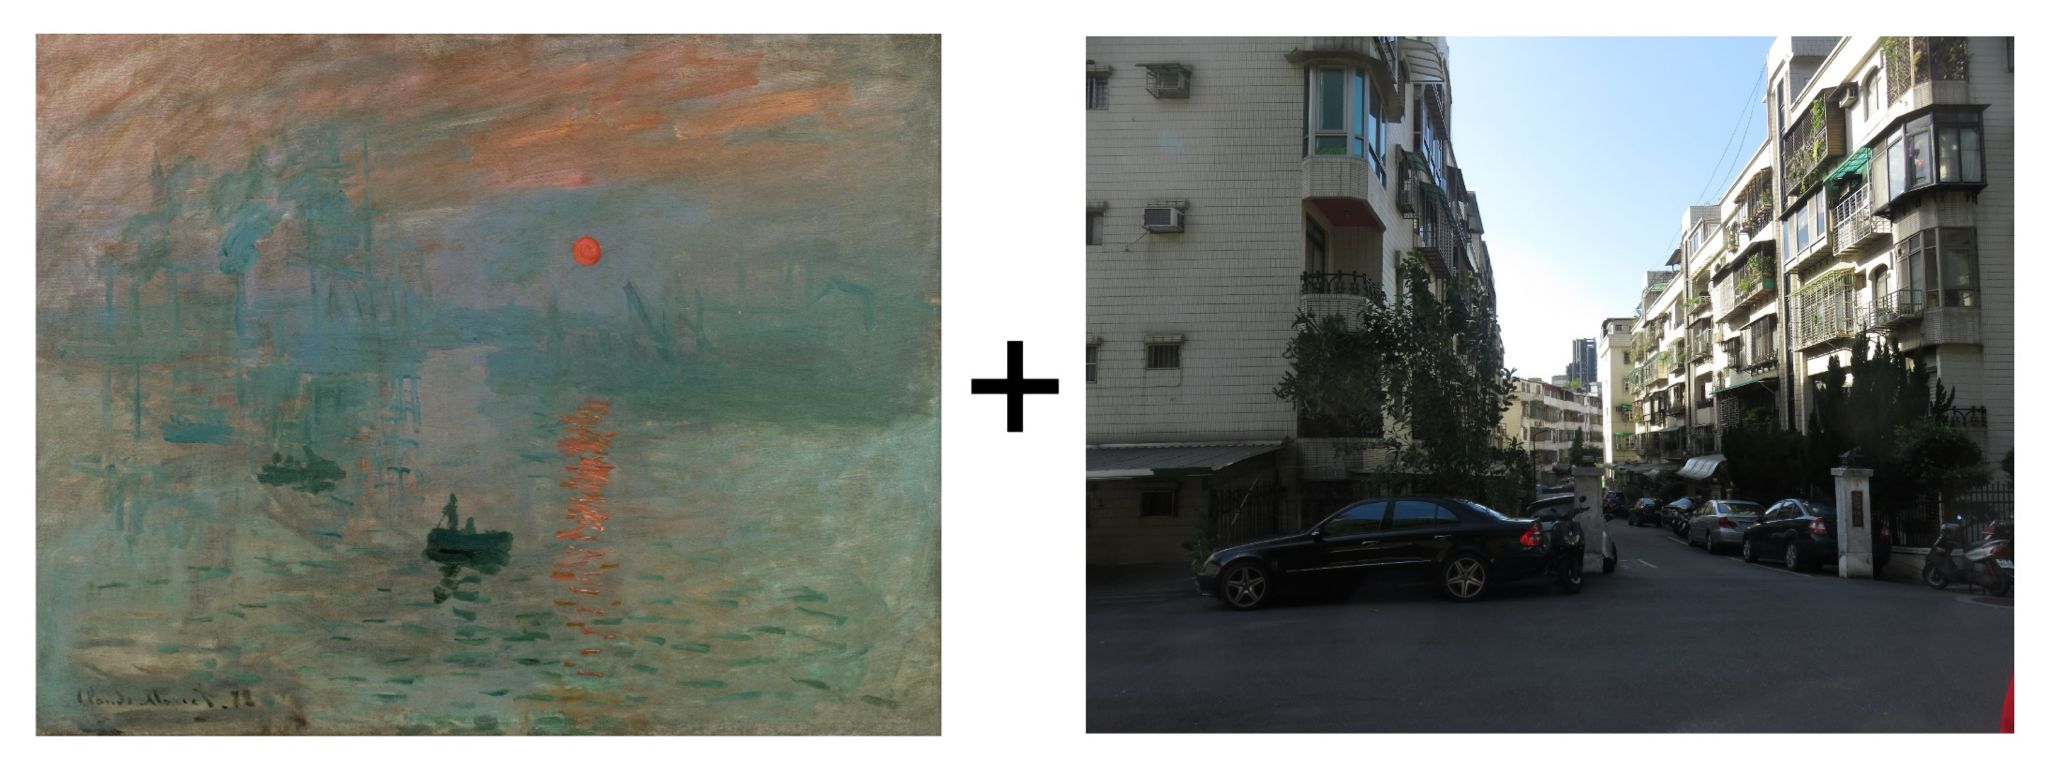 <br>
<b>Figure 10:</b> Combination of Monet 1 and our content image <br>

<b>Outcome</b> <br>
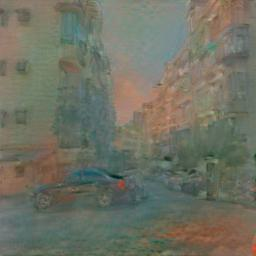 <br>
<b>Figure 11:</b> stylised_output.jpg <br>

The stylised image generated demonstrates a successful application of <b>single-style</b> neural transfer. The system was configured to optimise the stylised image over 800 steps, with the total loss steadily decreasing from over 17 million to approximately 10,000, reflecting convergence of both content and style objectives.

Visually, the stylised result preserves the semantic structure of the original content image (figure 1, taiwancity.jpg), while incorporating the colour palette, texture, and brushstroke patterns from the selected style image. Subtle strokes and colour washes from the style are visible in the sky, road, and facade areas, indicating effective texture transfer through the Gram matrix representations.

Despite the lower resolution (256×256), which is chosen to keep training feasible on a CPU, the output remains visually coherent and stylistically expressive. This confirms that:

- The content loss maintained the core layout,
- The style loss imposed texture and tone from the reference image,
- The optimiser (L-BFGS) successfully reduced loss over time.

Upon building the foundation established above, this phase introduces support for multi-style neural transfer, where multiple style references are blended into a unified stylised image. The purpose of this extension is to explore the creative potential of merging styles (e.g., Monet and Van Gogh), and to prepare the system for later interactive control.

The core model architecture remains unchanged, where the same VGG-19 feature extractor and L-BFGS optimiser are used. However, the key changes lies in how the style loss is computed. Instead of extracting and comparing Gram matrices from a single style image, the model now averages the Gram matrices from all provided style images across selected layers. This produces a composite style embedding that drives the stylisation process.


## 5. Multi-Style Blending Implementation
This chapter extends the core NST functionality developed in Chapter 4 implementing  **multi-style blending**. Instead of applying a single artistic style to a content image, we combine the styles of two different artistic styles using an averaged style representation. This is achieved by computing and averaging the Gram matrices of multiple style images across defined convolutional layers. The result is a stylised output that combines the unique textural elements and colour palettes of multiple artists like Monet and Van Gogh.

This advancement aligns with the project’s goal to explore the interaction between CNN-based style representations and the educational value of artistic combinations. It sets the stage for further enhancements such as interactive style weighting and real-time controls.

### 5.1 Loading Two Style Images
Two style images (Monet and Van Gogh) are loaded and processed independently. Their style features are extracted using VGG-19. Then, for each style layer, the corresponding Gram matrices are averaged with equal weights. This results in a single blended style representation used for stylisation. The current weight set for this is 50%/50% pairwise blend.

In [8]:
# Step 1: Load two style images
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/vangogh1.jpg")

# Step 2: Extract style features from both stle images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50)
blended_grams = {}
for layer in style_layers:
    gram1 = gram_matrix(style_features_1[layer])
    gram2 = gram_matrix(style_features_2[layer])
    blended_grams[layer] = 0.5 * gram1 + 0.5 * gram2

In [9]:
# Step 4: Clone content image for target
target = content_image.clone().requires_grad_(True).to(device)

# Step 5: Optimise with L-BFGS
optimizer = torch.optim.LBFGS([target])
steps = 800
step_count = [0]

while step_count[0] <= steps:
    def closure():
        optimizer.zero_grad()
        target_features = get_features(target, vgg, content_layers + style_layers)

        # Content loss
        content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

        # Style loss using blended Gram matrices
        style_loss = 0
        for layer in style_layers:
            target_gram = gram_matrix(target_features[layer])
            style_gram = blended_grams[layer]
            layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
            style_loss += layer_loss / (target_gram.shape[1] ** 2)

        total_loss = content_weight * content_loss + style_weight * style_loss
        total_loss.backward()

        if step_count[0] % 100 == 0:
            print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")
        step_count[0] += 1
        return total_loss

    optimizer.step(closure)

Step 0 / 800 | Total loss: 13331973.00
Step 100 / 800 | Total loss: 13292.36
Step 200 / 800 | Total loss: 9309.03
Step 300 / 800 | Total loss: 8434.76
Step 400 / 800 | Total loss: 8065.61
Step 500 / 800 | Total loss: 7867.75
Step 600 / 800 | Total loss: 7743.98
Step 700 / 800 | Total loss: 7653.26
Step 800 / 800 | Total loss: 7586.19


The optimisation pipeline mirrors the single-style process, but now compares target image features to the blended style Gram matrices. Content loss and style loss are computed as before, and the L-BFGS optimiser updates the target image accordingly.

From a technical perspective, the loss progression during optimisation is a key metric in evaluating the effectiveness of neural style transfer (Gatys et al., 2016). The system begins with a high initial total loss of 13 million, which is expected when the target image is first instantiated as a raw copy of the content image and lacks any stylisation. As the optimisation proceeds, the total loss rapidly decreases, dropping below 13,000 by step 100. This steep decline in the early phase indicates effective alignment between the content and style feature spaces extracted from the pretrained VGG-19 network (Simonyan & Zisserman, 2015), as proposed in the style transfer framework of Gatys et al. (2016).

Between steps 200 to 800, the loss continues to decline, albeit more gradually, plateauing around 7,500. This tapering of loss reduction is characteristic of the L-BFGS optimisation process and suggests the system is reaching a stable convergence, fine tuning residual discrepancies in Gram matrix matching. The use of multiple style targets increases the complexity of the optimisation landscape, yet the system maintains convergence without destabilisation—an indicator of robust parameter balancing and architectural integrity.

In context, these results demonstrate the effectiveness of combining style features from multiple sources, as enabled by the style transfer formulation of Gatys et al. (2016). The loss function's balance—weighted at `1e4` for content and `1e3` for style—successfully preserved the structural integrity of the content image while incorporating stylistic elements from both artistic inputs. These findings affirm that the proposed multi-style transfer process achieves its goal of stylistic fusion while maintaining semantic recognisability, a core pedagogical and aesthetic objective of this prototype (Gatys et al., 2016; Simonyan and Zisserman, 2015).

In [10]:
# Step 6: Save and display result
final_image = target.clone().detach().squeeze(0).cpu()
final_image = unnormalize(final_image).clamp(0, 1)
save_image(final_image, "outputs/blended_output1.jpg")
print("Stylised image saved as 'blended_output1.jpg'")

Stylised image saved as 'blended_output1.jpg'


### 5.2 Result of Blending Two Styles

<b> Combination of 2 Style Images and Content Image: </b> <br>
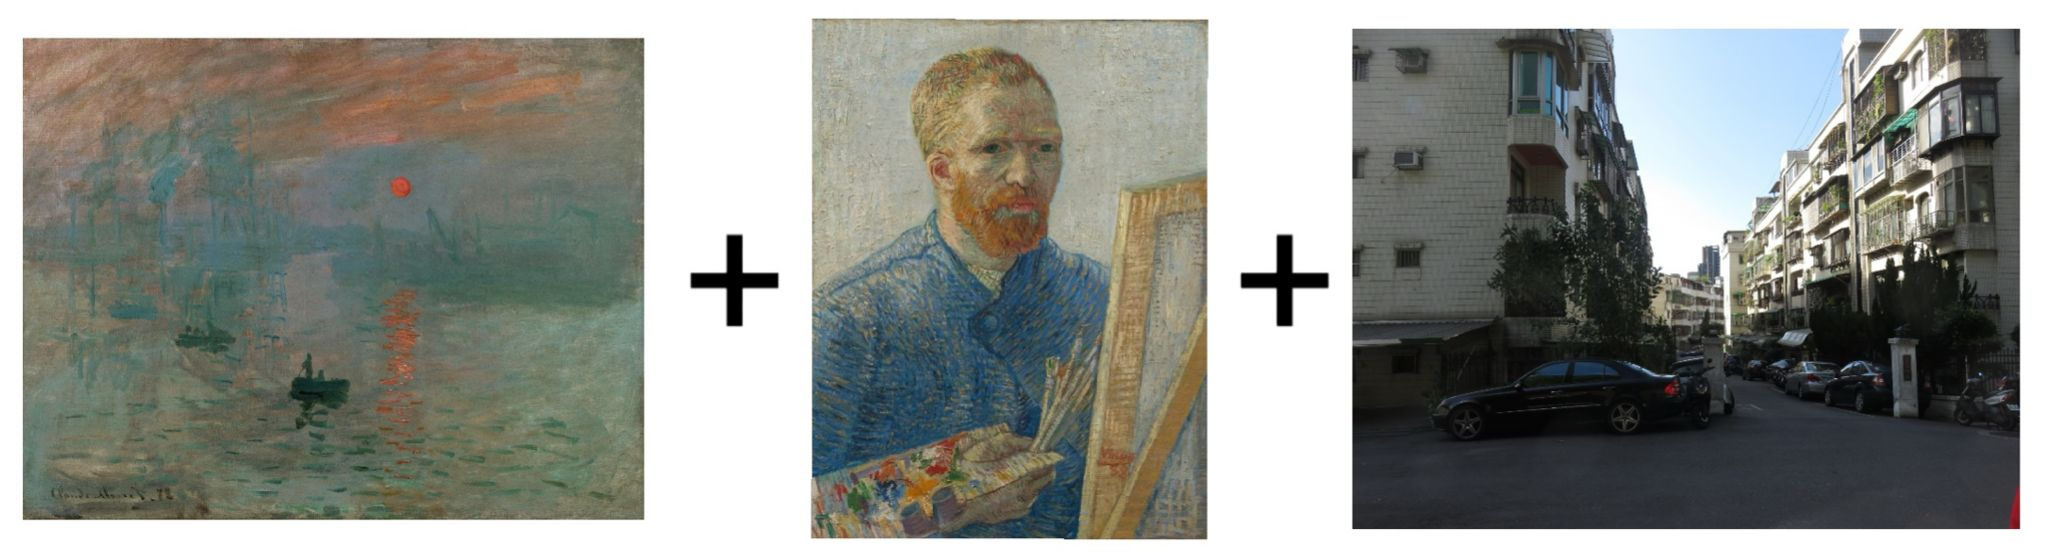

<b>Figure 12:</b> Combination of Monet 1 and Van Gogh 1 to our content image <br>

<b> Outcome of the 2 Styles Blended: </b> <br>
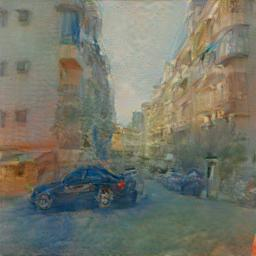 <br>

<b>Figure 13:</b> blended_output1.jpg <br>

The two style stylisation result demonstrates the model’s ability to seamlessly fuse artistic characteristics from two distinct painters, Claude Monet and Vincent Van Gogh, into a single output image. The stylised outcome, when applied to the content photograph of a residential street, inherits Monet’s signature misty atmosphere and colour softness while integrating Van Gogh’s expressive brushstrokes and dynamic line textures. This synthesis results in a visually compelling transformation that feels neither fully Impressionist nor fully Post-Impressionist but a harmonised blend of both.

The image retains structural coherence, allowing identifiable elements such as buildings, vehicles, and perspective depth to remain intact while being visually reimagined. Monet’s influence is particularly visible in the sky and lighting transitions, which reflect his use of diffused pastel tones, whereas Van Gogh’s contribution is more pronounced in the bolder line work and intensified colour patterns, particularly in the car and architecture surfaces.


### 5.3 Comaprison between Single Style and Two Style Blended

| Single Style                  | Two-Style Blended                     |
| :------------------------------------ | :-------------------------------------------- |
| 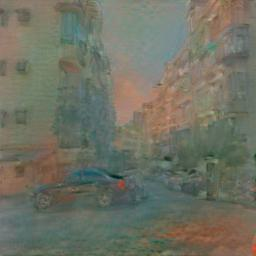 |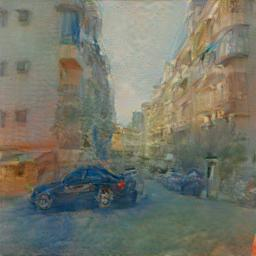|

| Feature                   | Single Style (Left)                   | Two-Style Blended (Right)                     |
| :------------------------ | :------------------------------------ | :-------------------------------------------- |
| **Colour Dominance**      | Dominated by red-orange & green tones | Balanced cool-warm mix, softer blend          |
| **Brushstroke Influence** | More impressionistic (Monet)          | Sharper contours suggesting Van Gogh addition |
| **Atmosphere**            | Gentle, airy                          | Slightly more intense and structured          |
| **Detail**                | More uniform texture                  | Clearer contrasts around architectural edges  |

<b>Figure 14:</b> Comparison between stylised_output.jpg and blended_output1.jpg<br>

When comparing the single style output with the two-style blended result, notable differences arise in visual complexity and texture diversity. The single style output is more predictable and homogeneous, typically inheriting dominant colour schemes and texture filters from one artist. For instance, a single Monet style results in a misty, pastel-rich rendering with softer textures, while a Van Gogh-only version may display more defined strokes and saturated colours.

In contrast, the two style output appears richer and more nuanced. It avoids the visual monotony that can sometimes emerge in single style results and instead offers a layered aesthetic where textures compete and cooperate across the canvas.

## 6. Stylisation Dataset Generation and Evaluation

This chapter focuses on the creation of a stylisation dataset comprising over <b>50 output images </b>, generated from different combinations of styles to our content image. The objective is to demonstrate the system’s flexibility, visual diversity, and pedagogical value when exposed to a range of inputs and style configurations.

Each blend is processed with equal weighting and 800 optimisation steps using the L-BFGS algorithm. The resulting outputs form the foundation of a stylisation dataset intended for qualitative comparison and artistic exploration, building on the pipelines established in Chapters 4 and 5. These outputs are stored with descriptive file names and presented selectively for qualitative analysis.

### 6.1 Batch Generation Strategy
To create a diverse dataset:
- 1 content image was selected
- 6 individual style images (3 Monet, 3 Van Gogh)
- 15 Pairwise combinations 
- Stylisation applied across 800 iterations using LBFGS
Total generated outputs >50 unique stylised images.

<b>Total style images:</b> `monet1.jpg`,`monet2.jpg`, `monet3.jpg`, `vangogh1.jpg`,`vangogh2.jpg`,`vangogh3.jpg`

<b>Pairwise Combinations (15):</b> 
1. `monet1.jpg` + `monet2.jpg`
2. `monet1.jpg` + `monet3.jpg`
3. `monet1.jpg` + `vangogh1.jpg`
4. `monet1.jpg` + `vangogh2.jpg`
5. `monet1.jpg` + `vangogh3.jpg`
7. `monet2.jpg` + `monet3.jpg`
8. `monet2.jpg` + `vangogh1.jpg`
9. `monet2.jpg` + `vangogh2.jpg`
10. `monet2.jpg` + `vangogh3.jpg`
12. `monet3.jpg` + `vangogh1.jpg`
13. `monet3.jpg` + `vangogh2.jpg`
14. `monet3.jpg` + `vangogh3.jpg`
16. `vangogh1.jpg` + `vangogh2.jpg`
17. `vangogh1.jpg` + `vangogh3.jpg`
18. `vangogh2.jpg` + `vangogh3.jpg`

### 6.2 Blending Strategy: Baseline and Weighted Variants
For each of the 15 pairwise style combinations, we generate not only a baseline output using a <b>50%-50%</b> equal weighting, but also multiple asymmetrically weighted variations <b>(e.g. 70%-30%, 30%-70%, etc.)</b>. This dual approach enables a more nuanced exploration of how stylistic dominance affects the final visual outcome. The 50%-50% baseline serves as a neutral reference point, offering balanced contributions from both styles. In contrast, the custom weights simulate real world creative intent, where an artist or user, might prioritise one influence over another. This strategy aligns with the project’s educational goals: learners can empirically observe how hyperparameters (style-weight ratios) alter artistic synthesis, reinforcing the interpretability of NST’s feature-space manipulations (Gatys et al., 2016). These outputs enrich the dataset while demonstrating how artistic features interact under varying blending dynamics, which is a critical insight for both technical and artistic applications.

### 6.3 Implementation & Generation

#### <b>1) First Pairwise Combination: `monet1.jpg` + `monet2.jpg` </b>

In [11]:
# Step 1: Load two style images: monet1.jpg + monet2.jpg
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/monet2.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet1_monet2_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 7149881.50
Step 100 / 800 | Total loss: 16123.99
Step 200 / 800 | Total loss: 9940.15
Step 300 / 800 | Total loss: 8674.61
Step 400 / 800 | Total loss: 8156.50
Step 500 / 800 | Total loss: 7882.99
Step 600 / 800 | Total loss: 7718.33
Step 700 / 800 | Total loss: 7606.05
Step 800 / 800 | Total loss: 7521.76
Saved: outputs/blended_monet1_monet2_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 9505860.00
Step 100 / 800 | Total loss: 14585.79
Step 200 / 800 | Total loss: 9324.75
Step 300 / 800 | Total loss: 8258.13
Step 400 / 800 | Total loss: 7832.07
Step 500 / 800 | Total loss: 7600.90
Step 600 / 800 | Total loss: 7459.35
Step 700 / 800 | Total loss: 7360.85
Step 800 / 800 | Total loss: 7287.88
Saved: outputs/blended_monet1_monet2_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 7179624.00
Step 100 / 800 | Total loss: 17764.90
Step 200 / 800 | Total loss: 11826.91
St

#### <b> Outcome of First Pairwise Combination: monet1 + monet2 </b> <br>

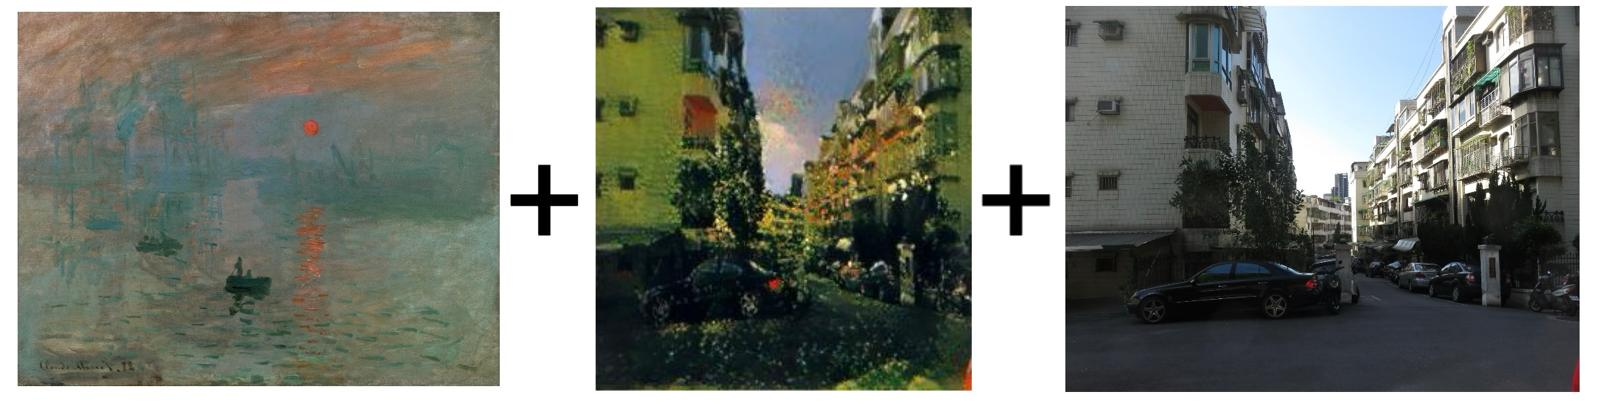 <br>
<b>Figure 15</b>: single style image content image with Monet 1 & Monet 2 <br>

This pairwise combination explores how blending two artworks by the same artist, Claude Monet, affects the final neural style transfer (NST) result. Monet's impressionist style is characterised by soft brushstrokes, atmospheric light, and a pastel-toned palette. Both monet1.jpg and monet2.jpg exhibit these traits, but differ in their use of lighting, hue distribution, and compositional flow. By combining the two with various weights, we allow the NST model to interpolate stylistic elements and create hybrid impressions.


<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 1, 50% Monet 2 Blend: </b> <br>
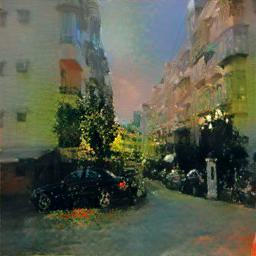 <br>
<b>Figure 16</b>: blended_monet1_monet2_50_50.jpg<br>

The result is a balanced composition that harmonises both Monet styles. The brush texture appears uniformly dispersed across the image, and colour tones (light blues, greens, and soft oranges) are evenly integrated. This configuration serves as a baseline reference for assessing influence shifts.

<u><b>70%-80% Monet 1 + 30%-20% Monet 2</b></u> <br>


| 70-30: <br> 70% Monet 1, 30% Monet 2                | 80-20: <br> 80% Monet 1, 20% Monet 2                 |
| ------------------------ | ------------------------------------ |
| 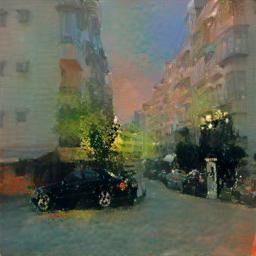      | 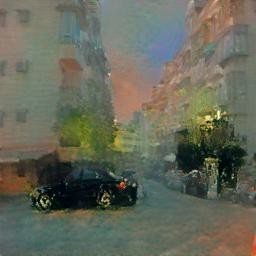 | 

<b>Figure 17</b>: blended_monet1_monet2_70_30.jpg<br>
<b>Figure 18</b>: blended_monet1_monet2_80_20.jpg<br>

In these 2 blend weightage, the emphasis shifts subtly towards the ambiance and stylistic smoothness of Monet 1. The image may seem more diffused and dreamlike, with finer gradations in shadow and tone. In 80-20, Monet 2’s influence softens the whole image, leading to more impressionistic smoothing and muted colour blending.


<u><b>30%-20% Monet 1 + 70%-80% Monet 2</b></u><br>

| 30-70: <br> 30% Monet 1, 70% Monet 2                   | 20-80: <br> 20% Monet 1, 80% Monet 2                    |
| ------------------------ | ------------------------------------ |
| 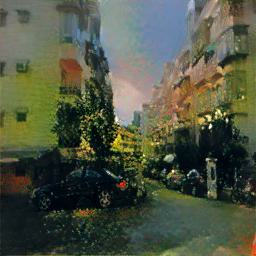      | 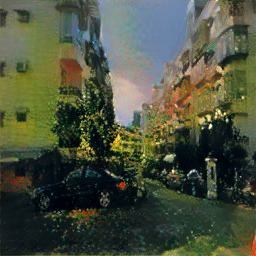 | 

<b>Figure 19</b>: blended_monet1_monet2_30_70.jpg<br>
<b>Figure 20</b>: blended_monet1_monet2_20_80.jpg<br>


The image leans toward the characteristics of Monet 2, potentially brighter lighting or more distinct floral forms. Brushstroke intensity may appear more prominent or textured on specific architectural edges or vegetation patches. In 20-80, the influence of Monet 2 becomes dominant, highlighting texture and more vivid brush marks, showing stronger structure retention.

<b> Loss Function Analysis </b> <br>
All variations converged below ~7500, showing stable optimisation. The loss differences are minor between blends, suggesting stylistic interpolation has limited impact on convergence difficulty.

<b>  Summary of `Monet 1 + Monet 2` </b> <br>
This blend showcases NST’s power to interpolate between closely related styles. The fact that both styles originate from Monet allows for a seamless fusion, making stylistic influence shifts subtler but still observable. It demonstrates that even within a single artist’s catalogue, weight blending introduces nuance, variability, and pedagogical potential for learners studying style evolution.

#### <b>2) Second Pairwise Combination: `monet1.jpg` + `monet3.jpg` </b>

In [12]:
# Step 1: Load two style images: monet1.jpg + monet3.jpg
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/monet3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet1_monet3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 15444104.00
Step 100 / 800 | Total loss: 16227.14
Step 200 / 800 | Total loss: 11470.36
Step 300 / 800 | Total loss: 10266.02
Step 400 / 800 | Total loss: 9752.44
Step 500 / 800 | Total loss: 9472.09
Step 600 / 800 | Total loss: 9292.67
Step 700 / 800 | Total loss: 9175.31
Step 800 / 800 | Total loss: 9088.63
Saved: outputs/blended_monet1_monet3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 15935551.00
Step 100 / 800 | Total loss: 16011.76
Step 200 / 800 | Total loss: 11920.35
Step 300 / 800 | Total loss: 10842.40
Step 400 / 800 | Total loss: 10337.99
Step 500 / 800 | Total loss: 10036.81
Step 600 / 800 | Total loss: 9845.84
Step 700 / 800 | Total loss: 9705.11
Step 800 / 800 | Total loss: 9597.70
Saved: outputs/blended_monet1_monet3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 15400842.00
Step 100 / 800 | Total loss: 16337.64
Step 200 / 800 | Total loss: 11

#### Outcome of Second Pairwise Combination: monet1.jpg + monet3.jpg

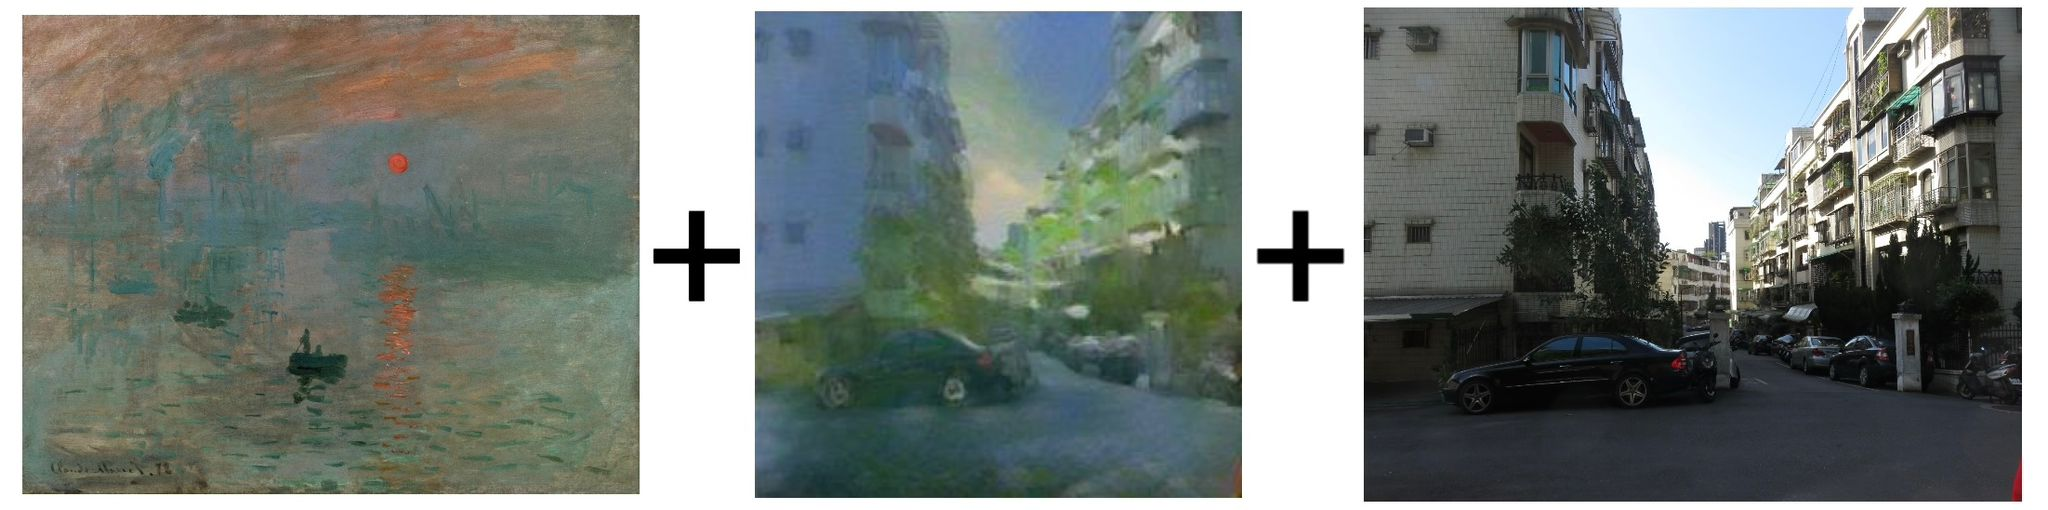 <br>
<b>Figure 21:</b> single style image content image with monet1 & monet3<br>

The blended outputs from monet1.jpg and monet3.jpg exhibit a progressive and noticeable variation in colour dominance and texture emphasis across different weightings


<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 1, 50% Monet 3 Blend: </b> <br>
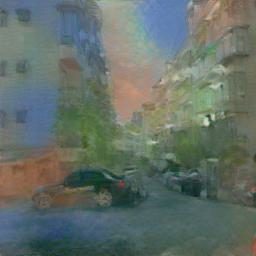 <br>
<b>Figure 22</b>: blended_monet1_monet3_50_50.jpg<br>

A balanced fusion of both Monet images. The textures merge into harmonious gradients across the walls and road surface. Colour blending is more complex and evenly distributed, showcasing the compatibility of the two styles.

<u><b>70%-80% Monet 1 + 30%-20% Monet 3</b></u> <br>


| 70-30: <br> 70% Monet 1, 30% Monet 3                 | 80-20: <br> 80% Monet 1, 20% Monet 3                   |
| ------------------------ | ------------------------------------ |
| 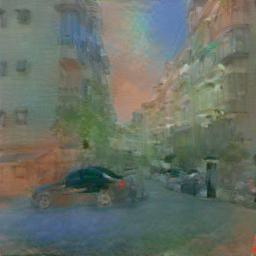      |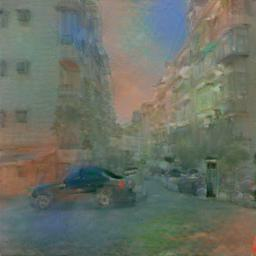 | 

<b>Figure 23</b>: blended_monet1_monet3_70_30.jpg<br>
<b>Figure 24</b>: blended_monet1_monet3_80_20.jpg<br>

Monet1’s warmth and bolder lighting dominate in the 70-30 combination, where structures appear more contrasted, and the brush textures are slightly sharper. The influence of Monet1 is strongest in the 80-20 combination, with orange-red brushstrokes appearing more prominently on the lower pavement and car surface. The overall output is vibrant but less nuanced.


<u><b>30%-20% Monet 1 + 70%-80% Monet 3</b></u><br>

| 30-70: <br> 30% Monet 1, 70% Monet 3                    | 20-80: <br> 20% Monet 1, 80% Monet 3                    |
| ------------------------ | ------------------------------------ |
|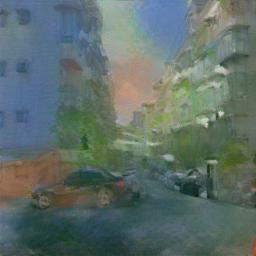      | 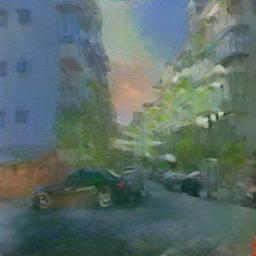| 

<b>Figure 25</b>: blended_monet1_monet3_30_70.jpg<br>
<b>Figure 26</b>: blended_monet1_monet3_20_80.jpg<br>

Texture becomes marginally more varied in these 2 combinations. The composition adopts mostly Monet3’s cooler palette and subtler brush textures, where stylisation is softer. Pastel green blue hues dominates the image’s depth and corners, evoking a tranquil and foggy atmosphere. The lower-left shadows gain warmth, hinting at Monet1’s influence and in consistency with Monet3’s soft diffusion. 

<b> Loss Function Analysis </b> <br>
The loss trends align well with expected convergence behaviour across all five weight configurations. All stylisations achieved stable convergence within 800 iterations, where the final total losses ranged from 9088.63 to 9597.70. With the 50% - 50% blend producing one of the lowest loss values, indicating a more harmonious integration. Initial losses ranged between 15M and 16M, demonstrating that despite stylistic proximity, the models still required iterative optimisation to achieve perceptually coherent blends.
In terms of interpretability, lower final losses often correspond to more blended and smooth transitions across features (as in the 50-50 or 30-70 blends), whereas higher final losses like those in 80-20 blends still produce stylised results, but with potentially more visual tension between competing textures (Gatys et al., 2016).

#### <b>3) Third Pairwise Combination: `monet1.jpg` + `vangogh1.jpg` </b>

In [13]:
# Step 1: Load two style images: monet1.jpg + vangogh1.jpg
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/vangogh1.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet1_vangogh1_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 13331973.00
Step 100 / 800 | Total loss: 13292.36
Step 200 / 800 | Total loss: 9309.03
Step 300 / 800 | Total loss: 8434.76
Step 400 / 800 | Total loss: 8065.61
Step 500 / 800 | Total loss: 7867.75
Step 600 / 800 | Total loss: 7743.98
Step 700 / 800 | Total loss: 7653.26
Step 800 / 800 | Total loss: 7586.19
Saved: outputs/blended_monet1_vangogh1_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 14834345.00
Step 100 / 800 | Total loss: 13568.71
Step 200 / 800 | Total loss: 9833.91
Step 300 / 800 | Total loss: 8972.06
Step 400 / 800 | Total loss: 8590.02
Step 500 / 800 | Total loss: 8369.68
Step 600 / 800 | Total loss: 8217.56
Step 700 / 800 | Total loss: 8107.00
Step 800 / 800 | Total loss: 8029.05
Saved: outputs/blended_monet1_vangogh1_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 12056352.00
Step 100 / 800 | Total loss: 13732.04
Step 200 / 800 | Total loss: 9051

#### Outcome of Third Pairwise Combination: monet1.jpg + vangogh1.jpg

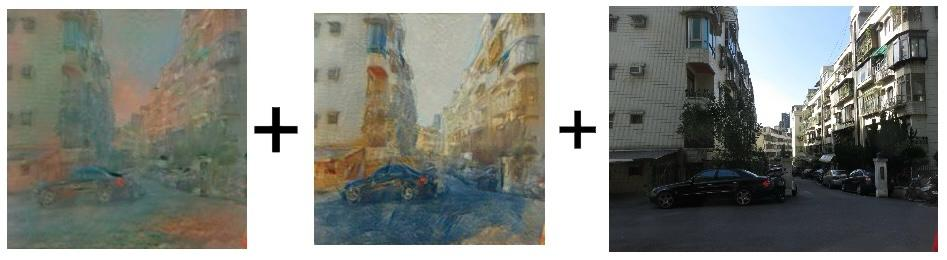 <br>
<b>Figure 27:</b> single style image content image with monet1 & vangogh1 <br>
The stylisation results from blending Monet 1 and Van Gogh 1 show a unique combination of hazy impressionist lighting and distinct expressionist brushwork.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 1, 50% Van Gogh 1 Blend: </b> <br>
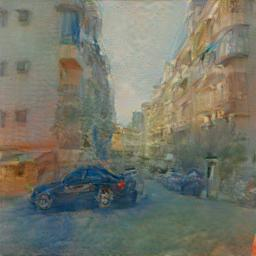 <br>
<b>Figure 28</b>: blended_monet1_vangogh1_50_50.jpg<br>

A balanced fusion of both Monet images. The textures merge into harmonious gradients across the walls and road surface. Colour blending is more complex and evenly distributed, showcasing the compatibility of the two styles.

<u><b>70%-80% Monet 1 + 30%-20% Van Gogh 1</b></u> <br>


| 70-30: <br> 70% Monet 1, 30% Van Gogh 1                   | 80-20: <br> 80% Monet 1, 20% Van Gogh 1                    |
| ------------------------ | ------------------------------------ |
| 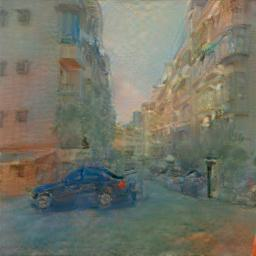 | 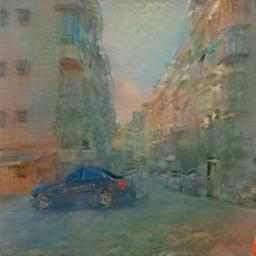 | 

<b>Figure 29</b>: blended_monet1_vangogh1_70_30.jpg<br>
<b>Figure 30</b>: blended_monet1_vangogh1_80_20.jpg<br>

In this higher Monet dominant weights, the output shifts towards a gentler and pastel toned composition, featuring washed out green foliage and softened structural outline, closely aligned with impressionist aesthetics.

<u><b>30%-20% Monet 1 + 70%-80% Van Gogh 1</b></u><br>

| 30-70: <br> 30% Monet 1, 70% Van Gogh 1                   | 20-80: <br> 20% Monet 1, 80% Van Gogh 1                    |
| ------------------------ | ------------------------------------ |
|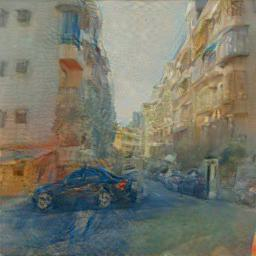    | 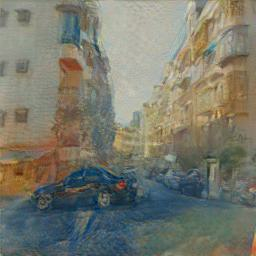| 

<b>Figure 31</b>: blended_monet1_vangogh1_30_70.jpg<br>
<b>Figure 32</b>: blended_monet1_vangogh1_20_80.jpg<br>

Conversely, increasing Van Gogh's contribution leads to deeper shadows, crisper edges, and more vibrant contrast across surfaces such as building walls and vehicle contours. These 2 blends shows much deeper shadows and contrasts with most aspect of the image dominated by Van Gogh’s art style.

<b> Loss Function Analysis </b> <br>
Loss progression across all five blending weights demonstrates stable convergence over 800 optimisation steps. The total loss decreased from initial values, ranging between 11M to 15M, to a final loss between 7,357 and 8,433, reflecting successful optimisation across all blends. Notably, the 30–70 configuration, Monet to Van Gogh, reached the lowest final loss of 7,357.76, suggesting an efficient match between the style features and the content layout under this weighting. Meanwhile, higher Monet weightings like 80–20 resulted in slightly higher final losses, potentially due to the subtler and more spatially diffuse features of Monet’s style, which require more iteration to align with the content image. The consistent downward trend in loss validates both the stylistic expressiveness and technical stability of the model’s output pipeline for this pairing.

#### <b>4) Forth Pairwise Combination: `monet1.jpg` + `vangogh2.jpg` </b>

In [14]:
# Step 1: Load two style images: monet1.jpg + vangogh2.jpg
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/vangogh2.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet1_vangogh2_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 7507423.00
Step 100 / 800 | Total loss: 24296.68
Step 200 / 800 | Total loss: 14034.03
Step 300 / 800 | Total loss: 12247.16
Step 400 / 800 | Total loss: 11608.08
Step 500 / 800 | Total loss: 11302.22
Step 600 / 800 | Total loss: 11122.65
Step 700 / 800 | Total loss: 11006.29
Step 800 / 800 | Total loss: 10923.80
Saved: outputs/blended_monet1_vangogh2_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 10216572.00
Step 100 / 800 | Total loss: 19871.59
Step 200 / 800 | Total loss: 12173.29
Step 300 / 800 | Total loss: 10615.62
Step 400 / 800 | Total loss: 10015.06
Step 500 / 800 | Total loss: 9707.63
Step 600 / 800 | Total loss: 9531.80
Step 700 / 800 | Total loss: 9413.08
Step 800 / 800 | Total loss: 9329.73
Saved: outputs/blended_monet1_vangogh2_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6522419.00
Step 100 / 800 | Total loss: 29741.69
Step 200 / 800 | Total lo

#### Outcome of Fourth Pairwise Combination: monet1.jpg + vangogh2.jpg

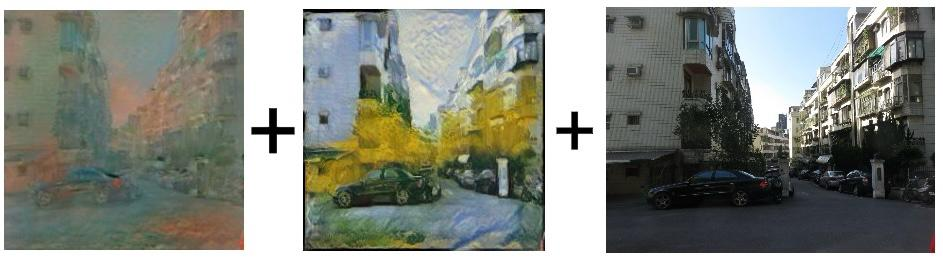 <br>
<b>Figure 33:</b> single style image content image with monet1 & vangogh2 <br>
The series of images generated by blending Monet 1 and Van Gogh 2 reveal noticeable changes in stylistic dominance as the weights are adjusted. 

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 1, 50% Van Gogh 2 Blend: </b> <br>
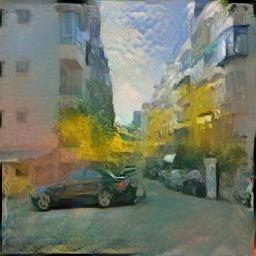 <br>
<b>Figure 34</b>: blended_monet1_vangogh2_50_50.jpg<br>

The stylised output appears evenly influenced by both artists. The soft pastel hues typical of Monet blend smoothly with Van Gogh’s vibrant textures, resulting in a balanced and luminous composition.

<u><b>70%-80% Monet 1 + 30%-20% Van Gogh 2</b></u> <br>


| 70-30: <br> 70% Monet 1, 30% Van Gogh 2                   | 80-20: <br> 80% Monet 1, 20% Van Gogh 2                    |
| ------------------------ | ------------------------------------ |
| 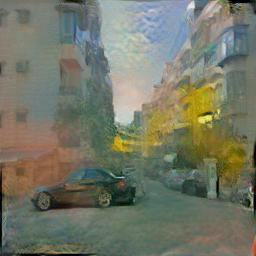 | 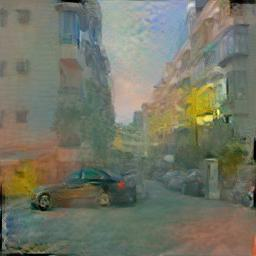 | 

<b>Figure 35</b>: blended_monet1_vangogh2_70_30.jpg<br>
<b>Figure 36</b>: blended_monet1_vangogh2_80_20.jpg<br>

As the weight of Monet 1 increases, the visual output shifts toward Monet’s signature haziness and gentle diffusion of light. The overall tone becomes softer with a muted palette and more atmospheric qualities, especially around the edges and sky.

<u><b>30%-20% Monet 1 + 70%-80% Van Gogh 2</b></u><br>

| 30-70: <br> 30% Monet 1, 70% Van Gogh 2                   | 20-80: <br> 20% Monet 1, 80% Van Gogh 2                    |
| ------------------------ | ------------------------------------ |
|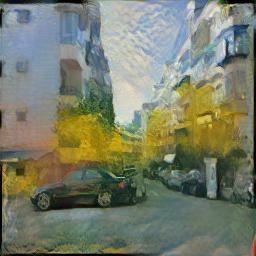   | 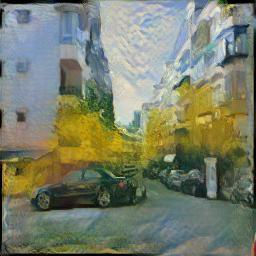| 

<b>Figure 37</b>: blended_monet1_vangogh2_30_70.jpg<br>
<b>Figure 38</b>: blended_monet1_vangogh2_20_80.jpg<br>

Increasing the influence of Van Gogh 2 yields more dramatic, defined brushwork and intensified yellow green contrasts in foliage and surfaces. The forms become more pronounced and the texture bolder, aligning with Van Gogh’s expressive strokes and dynamic spatial composition.

<b> Loss Function Analysis </b> <br>
From the optimisation logs, the total loss shows a typical downward trend across 800 iterations, confirming that the training successfully converges. The lowest final loss was observed at 30-70 and 20-80, with final loss values around 13,178 and 14,744 respectively. This suggests that the Van Gogh 2 style layers introduced more stylistic complexity, requiring greater optimisation effort to reconcile with the content structure. Higher Monet weightings like 70% and 80% reached lower total losses, 9329 and 9022 due to Monet’s smoother textures being easier to fit within the content layout. The loss patterns reflect the trade off between stylistic richness and optimisation complexity. Van Gogh’s texture rich layers demand more intricate alignment, leading to higher residual style loss when more heavily weighted.

#### <b>5) Fifth Pairwise Combination: `monet1.jpg` + `vangogh3.jpg` </b>

In [15]:
# Step 1: Load two style images: monet1.jpg + vangogh3.jpg
style_image_1 = load_image("style_images/monet1.jpg")
style_image_2 = load_image("style_images/vangogh3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet1_vangogh3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 10255712.00
Step 100 / 800 | Total loss: 19528.73
Step 200 / 800 | Total loss: 12557.62
Step 300 / 800 | Total loss: 11134.45
Step 400 / 800 | Total loss: 10546.70
Step 500 / 800 | Total loss: 10216.79
Step 600 / 800 | Total loss: 10013.21
Step 700 / 800 | Total loss: 9874.26
Step 800 / 800 | Total loss: 9770.05
Saved: outputs/blended_monet1_vangogh3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 12503963.00
Step 100 / 800 | Total loss: 17692.89
Step 200 / 800 | Total loss: 11052.75
Step 300 / 800 | Total loss: 9711.56
Step 400 / 800 | Total loss: 9212.62
Step 500 / 800 | Total loss: 8944.18
Step 600 / 800 | Total loss: 8777.05
Step 700 / 800 | Total loss: 8651.34
Step 800 / 800 | Total loss: 8560.46
Saved: outputs/blended_monet1_vangogh3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 8880390.00
Step 100 / 800 | Total loss: 22865.81
Step 200 / 800 | Total loss:

#### Outcome of Fifth Pairwise Combination: monet1.jpg + vangogh3.jpg

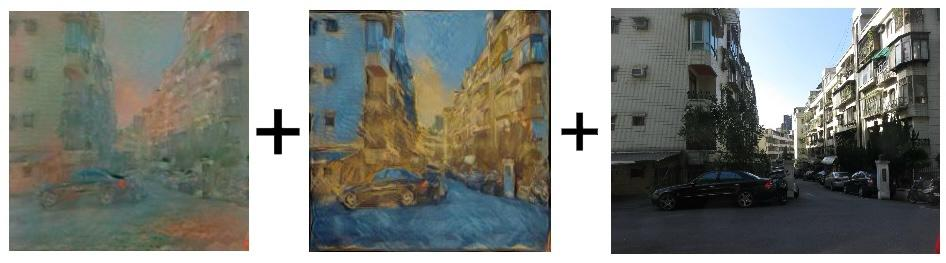 <br>
<b>Figure 39:</b> single style image content image with monet1 & vangogh3 <br>
This pairwise combination presents an engaging interplay of soft pastel strokes and sharp texture contrasts.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 1, 50% Van Gogh 3 Blend: </b> <br>
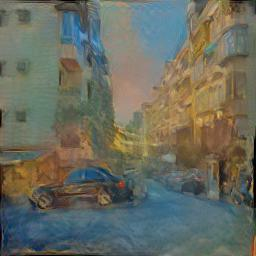 <br>
<b>Figure 40</b>: blended_monet1_vangogh3_50_50.jpg<br>

The result is quite balanced, maintaining soft light tones from Monet’s palette while incorporating Van Gogh’s swirling, dynamic brush effects. There’s a noticeable equilibrium between Monet’s impressionistic atmosphere and Van Gogh’s emotional intensity

<u><b>70%-80% Monet 1 + 30%-20% Van Gogh 3</b></u> <br>


| 70-30: <br> 70% Monet 1, 30% Van Gogh 3                   | 80-20: <br> 80% Monet 1, 20% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
| 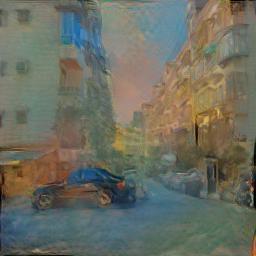 | 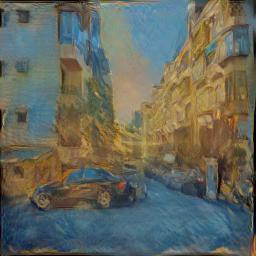 | 

<b>Figure 41</b>: blended_monet1_vangogh3_70_30.jpg<br>
<b>Figure 42</b>: blended_monet1_vangogh3_80_20.jpg<br>

As the Monet1 weight increases, the resulting images lean toward softer color gradients, particularly evident in the sky and building facades. The details become more muted and the textures reflect Monet’s fluid brushwork, producing a dreamlike quality.

<u><b>30%-20% Monet 1 + 70%-80% Van Gogh 3</b></u><br>

| 30-70: <br> 30% Monet 1, 70% Van Gogh 3                   | 20-80: <br> 20% Monet 1, 80% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
|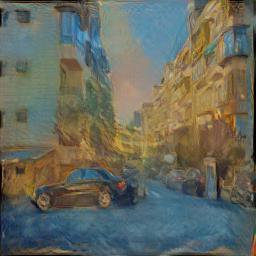   | 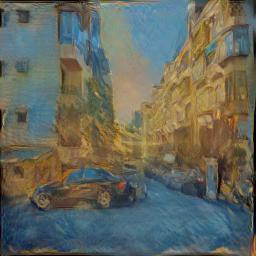| 

<b>Figure 43</b>: blended_monet1_vangogh3_30_70.jpg<br>
<b>Figure 44</b>: blended_monet1_vangogh3_20_80.jpg<br>

Conversely, at lower Monet1 weights, Van Gogh’s style becomes more dominant. The image takes on bolder strokes, higher contrast and defined line patterns. This is especially noticeable in the details of the sky and car. The 20:80 variant shows the most dramatic shift, with expressive yellow-blue hues and intensified brush lines overpowering the original photo structure.

<b> Loss Function Analysis </b> <br>
Across all blend ratios, the L-BFGS optimisation shows smooth convergence over 800 iterations. The final total loss ranges from around 8558 to around 13051, aligning with expected variation in Gram matrix distances as the stylistic dominance shifts. Notably, the lowest loss value is observed at the 80-20 blend, ending at 8558.85, while the highest loss is found at the 20-80 blend with 13051.60. This confirms that heavy Van Gogh influence introduces more stylistic variance and higher deviation from the content image.

This further supports the visual observation: *as the styles become more distinct, especially Van Gogh’s strong textures, the optimisation has more difficulty minimising style loss without distorting content features.*

#### <b>6) Sixth Pairwise Combination: `monet2.jpg` + `monet3.jpg` </b>

In [16]:
# Step 1: Load two style images: monet2.jpg + monet3.jpg
style_image_1 = load_image("style_images/monet2.jpg")
style_image_2 = load_image("style_images/monet3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet2_monet3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 7436138.50
Step 100 / 800 | Total loss: 15670.62
Step 200 / 800 | Total loss: 10121.31
Step 300 / 800 | Total loss: 8850.52
Step 400 / 800 | Total loss: 8326.32
Step 500 / 800 | Total loss: 8053.70
Step 600 / 800 | Total loss: 7889.36
Step 700 / 800 | Total loss: 7781.64
Step 800 / 800 | Total loss: 7700.80
Saved: outputs/blended_monet2_monet3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 7580493.00
Step 100 / 800 | Total loss: 18722.87
Step 200 / 800 | Total loss: 11879.82
Step 300 / 800 | Total loss: 10370.28
Step 400 / 800 | Total loss: 9757.46
Step 500 / 800 | Total loss: 9437.99
Step 600 / 800 | Total loss: 9243.85
Step 700 / 800 | Total loss: 9113.35
Step 800 / 800 | Total loss: 9015.72
Saved: outputs/blended_monet2_monet3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 9372022.00
Step 100 / 800 | Total loss: 13953.39
Step 200 / 800 | Total loss: 9125.76


#### Outcome of Sixth Pairwise Combination: monet2.jpg + monet3.jpg <br>

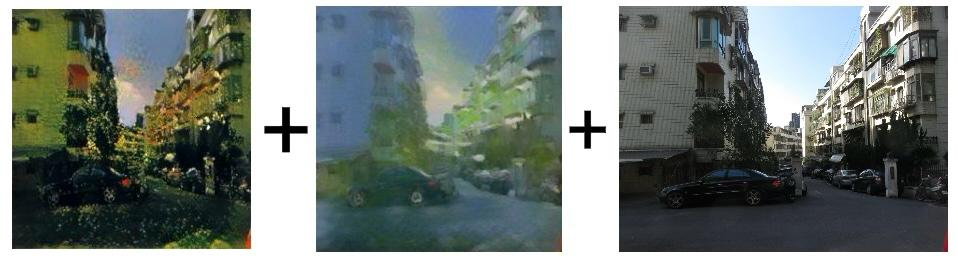 <br>
<b>Figure 45:</b> single style image content image with monet2 & monet3 <br>

Across the Monet 2 and Monet 3 blending results, a harmonious integration of the two Impressionist styles is observed. Yet, the variations in blending weight create distinct aesthetic effects.  The interaction between Monet 2’s vibrant garden aesthetics and Monet 3’s tranquil water surfaces yields a series of stylised outputs that progressively transition from bold clarity to soft abstraction.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 2, 50% Monet 3 Blend: </b> <br>
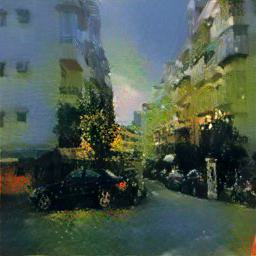 <br>
<b>Figure 46</b>: blended_monet2_monet3_50_50.jpg<br>

At the 50-50 blend, the output reveals a well balanced composition. Monet 2 contributes defined light contrasts and sharper outlines, while Monet 3 tempers the scene with delicate brushstrokes and gentle gradients. The result is a cityscape that feels alive but softened, assertive without overwhelming detail.


<u><b>70%-80% Monet 2 + 30%-20% Monet 3</b></u> <br>


| 70-30: <br> 70% Monet 2, 30% Monet 3                   | 80-20: <br> 80% Monet 2, 20% Monet 3                    |
| ------------------------ | ------------------------------------ |
|  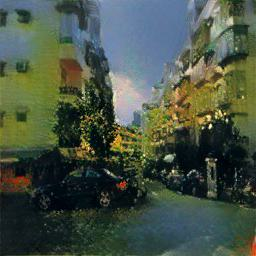 | 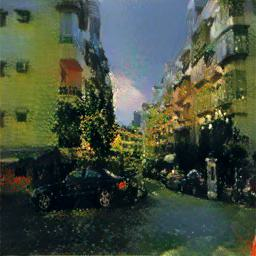 | 

<b>Figure 47</b>: blended_monet2_monet3_70_30.jpg<br>
<b>Figure 48</b>: blended_monet2_monet3_80_20.jpg<br>

As Monet 2’s weight increases, the scene grows more vivid and spatially grounded. The textures become bolder, the lighting more directional, and the colours notably brighter, particularly in the foliage and highlights. This aligns with Monet 2’s formal structure and saturated palette, evoking a stronger sense of realism and presence.

<u><b>30%-20% Monet 2 + 70%-80% Monet 3</b></u><br>

| 30-70: <br> 30% Monet 2, 70% Monet 3                   | 20-80: <br> 20% Monet 2, 80% Monet 3                    |
| ------------------------ | ------------------------------------ |
| 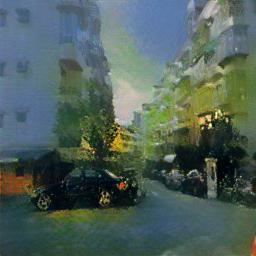  |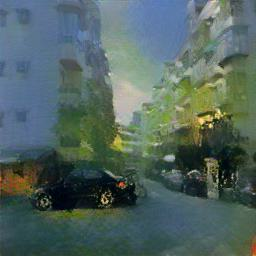| 

<b>Figure 49</b>: blended_monet2_monet3_30_70.jpg<br>
<b>Figure 50</b>: blended_monet2_monet3_20_80.jpg<br>

In contrast, as Monet 3's influences grows, the stylisation shifts toward a diffused and meditative appearance. Blurred edges with colour scheme adopting the bluish green tints and fluid transitions characteristic of Monet 3. By the 20-80 setting, the buildings and trees seem to dissolve into a calm wash of pigment, prioritising mood over definition.

<b> Loss Function Analysis </b> <br>
From the optimisation logs, the total loss consistently decreases across 800 iterations, indicating successful convergence for all Monet 2 and Monet 3 blending ratios. The lowest final loss was recorded at the 30–70 blend, with a final loss of 7265, followed closely by the 20–80 configuration at 7782. This suggests that the Monet 3 style contributes more abstract or stylised elements that align well with the content image, improving convergence. In contrast, higher Monet 2 proportions such as 70% and 80% yielded higher final losses, 9015 and 9913 respectively. This is likely due to Monet 2's more defined textures requiring additional optimisation effort to balance with Monet3’s looser, layered strokes. The loss values suggest that heavier Monet 3 blending improves style content harmony in this pairing, while heavier Monet 2 weights introduce slightly more optimisation resistance.

#### <b>7) Seventh Pairwise Combination: `monet2.jpg` + `vangogh1.jpg` </b>

In [17]:
# Step 1: Load two style images: monet2.jpg + vangogh1.jpg
style_image_1 = load_image("style_images/monet2.jpg")
style_image_2 = load_image("style_images/vangogh1.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet2_vangogh1_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 6468064.00
Step 100 / 800 | Total loss: 15058.90
Step 200 / 800 | Total loss: 9353.98
Step 300 / 800 | Total loss: 8099.74
Step 400 / 800 | Total loss: 7596.36
Step 500 / 800 | Total loss: 7342.35
Step 600 / 800 | Total loss: 7196.42
Step 700 / 800 | Total loss: 7094.90
Step 800 / 800 | Total loss: 7021.48
Saved: outputs/blended_monet2_vangogh1_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 7440296.50
Step 100 / 800 | Total loss: 16541.83
Step 200 / 800 | Total loss: 11083.54
Step 300 / 800 | Total loss: 9729.21
Step 400 / 800 | Total loss: 9180.59
Step 500 / 800 | Total loss: 8893.36
Step 600 / 800 | Total loss: 8716.33
Step 700 / 800 | Total loss: 8597.72
Step 800 / 800 | Total loss: 8512.09
Saved: outputs/blended_monet2_vangogh1_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6988539.50
Step 100 / 800 | Total loss: 14876.77
Step 200 / 800 | Total loss: 8447.6

#### Outcome of Seventh Pairwise Combination: monet2.jpg + vangogh1.jpg <br>

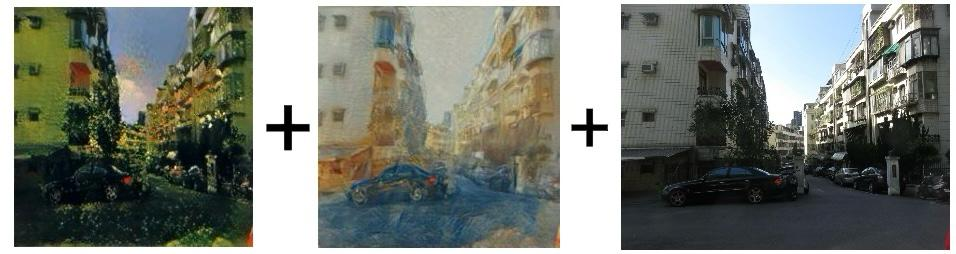 <br>
<b>Figure 51:</b> single style image content image with monet2 & vangogh1 <br>

This blend pairs the rich greenery and loose brush strokes of Monet2 with the dynamic lighting and swirling textures of Van Gogh1. Each output varies subtly depending on the weight distribution, affecting visual clarity, contrast, and stylistic intensity.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 2, 50% Van Gogh 1 Blend: </b> <br>
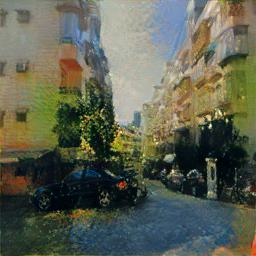 <br>
<b>Figure 52</b>: blended_monet2_vangogh1_50_50.jpg<br>

The output presents a harmonious fusion of both styles. The background buildings are stylized with Van Gogh’s intense textures, while the foreground and sky are softened by Monet’s pastel hues. This balance makes the image aesthetically pleasing with a moderate degree of abstraction.


<u><b>70%-80% Monet 2 + 30%-20% Van Gogh 1</b></u> <br>


| 70-30: <br> 70% Monet 2, 30% Van Gogh 1                   | 80-20: <br> 80% Monet 2, 20% Van Gogh 1                    |
| ------------------------ | ------------------------------------ |
|  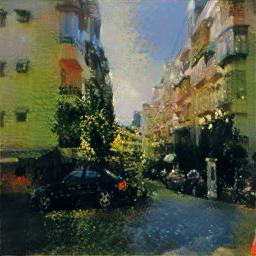 | 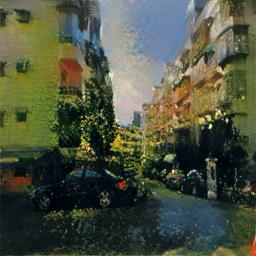 | 

<b>Figure 53</b>: blended_monet2_vangogh1_70_30.jpg<br>
<b>Figure 54</b>: blended_monet2_vangogh1_80_20.jpg<br>

With Monet taking strong control, the image is much softer. Building edges blur and the overall composition looks like a watercolor wash. There is minimal texture distortion, making it more serene but slightly less detailed.  These blends emphasizes Monet’s gentler color palette and blurry, dreamlike details. Van Gogh’s impact is still visible in the lighting, but textures are smoother and less turbulent. The car and street appear more grounded and less abstract.

<u><b>30%-20% Monet 2 + 70%-80% Van Gogh 1</b></u><br>

| 30-70: <br> 30% Monet 2, 70% Van Gogh 1                   | 20-80: <br> 20% Monet 2, 80% Van Gogh 1                   |
| ------------------------ | ------------------------------------ |
| 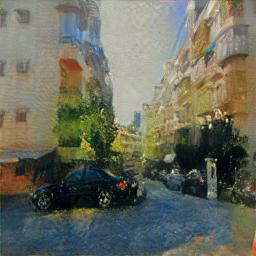  |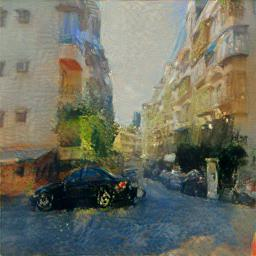 | 

<b>Figure 55</b>: blended_monet2_vangogh1_30_70.jpg<br>
<b>Figure 56</b>: blended_monet2_vangogh1_20_80.jpg<br>

Van Gogh’s influence dominates in these blends. The brushstroke effects intensifies, adding dramatic contrast and movement. Monet’s style is still evident in the color transitions, but the scene adopts a more expressive and emotional tone. This creates a powerful Van Gogh effect. Bold strokes and high contrast dominating the scene. Monet’s influence subtly balances the shadows, but the overall result is intense and expressive, showing a highly stylised artistic outcome.

<b> Loss Function Analysis </b> <br>
From the optimisation logs, the total loss exhibits a steady decline, confirming convergence throughout training. The best performing blends in terms of loss were the 30–70 and 20–80 configurations, reaching final loss values of 6517 and 6843 respectively. These configurations benefited from Van Gogh 1's strong directional textures, which appear to anchor style transfer efficiently within the content image. In contrast, higher Monet 2 ratios at 70% and 80% converged to higher losses of 8512 and 9513. This reflects Monet 2’s more diffused and gentle textures, which may not guide the network as decisively. The balanced 50–50 blend settled at 7021, indicating strong compatibility between both styles. Overall, Van Gogh 1's bold texture appears to dominate convergence when weighted more heavily, while Monet2's softness slows optimisation slightly when overly dominant.

#### <b>8) Eighth Pairwise Combination: `monet2.jpg` + `vangogh2.jpg` </b>

In [18]:
# Step 1: Load two style images: monet2.jpg + vangogh2.jpg
style_image_1 = load_image("style_images/monet2.jpg")
style_image_2 = load_image("style_images/vangogh2.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet2_vangogh2_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 8641581.00
Step 100 / 800 | Total loss: 26716.26
Step 200 / 800 | Total loss: 16053.15
Step 300 / 800 | Total loss: 13462.02
Step 400 / 800 | Total loss: 12393.17
Step 500 / 800 | Total loss: 11834.17
Step 600 / 800 | Total loss: 11510.91
Step 700 / 800 | Total loss: 11281.65
Step 800 / 800 | Total loss: 11098.73
Saved: outputs/blended_monet2_vangogh2_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 9540899.00
Step 100 / 800 | Total loss: 21096.55
Step 200 / 800 | Total loss: 13665.36
Step 300 / 800 | Total loss: 11764.24
Step 400 / 800 | Total loss: 11009.40
Step 500 / 800 | Total loss: 10599.96
Step 600 / 800 | Total loss: 10357.26
Step 700 / 800 | Total loss: 10191.77
Step 800 / 800 | Total loss: 10072.34
Saved: outputs/blended_monet2_vangogh2_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 8172982.50
Step 100 / 800 | Total loss: 34760.79
Step 200 / 800 | Total

#### Outcome of Eighth Pairwise Combination: monet2.jpg + vangogh2.jpg <br>

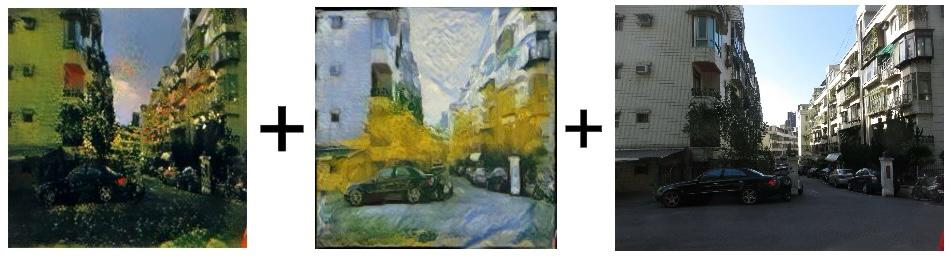<br>
<b>Figure 57:</b> single style image content image with monet2 & vangogh2 <br>

The stylisation outcomes from blending Monet 2 and Van Gogh 2 demonstrate a broad range of visual moods depending on the weighting configuration.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 2, 50% Van Gogh 2 Blend: </b> <br>
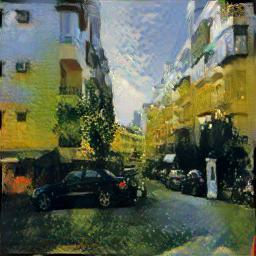<br>
<b>Figure 58</b>: blended_monet2_vangogh2_50_50.jpg<br>

This blend appears balanced yet rich, capturing the structured clarity and atmospheric depth of Monet2. It also captured textured energy and golden tones of Van Gogh2. The buildings take on a soft but vibrant glow, while shadows maintain realistic depth.

<u><b>70%-80% Monet 2 + 30%-20% Van Gogh 2</b></u> <br>


| 70-30: <br> 70% Monet 2, 30% Van Gogh 2                   | 80-20: <br> 80% Monet 2, 20% Van Gogh 2                    |
| ------------------------ | ------------------------------------ |
| 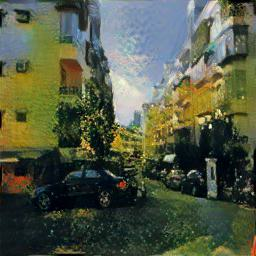 | 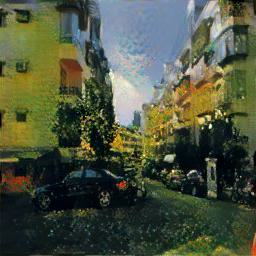 | 

<b>Figure 59</b>: blended_monet2_vangogh2_70_30.jpg<br>
<b>Figure 60</b>: blended_monet2_vangogh2_80_20.jpg<br>

As Monet2’s weight increases, the outputs exhibited smoother textures and cooler tones. The more dominant Monet 2 softens Van Gogh’s punchy brushstrokes, leading to compositions that feel less intense but more refined. The 80-20 blend in particular, feels tranquil and fluid, resembling the misty qualities of Monet’s later works.

<u><b>30%-20% Monet 2 + 70%-80% Van Gogh 2</b></u><br>

| 30-70: <br> 30% Monet 2, 70% Van Gogh 2                   | 20-80: <br> 20% Monet 2, 80% Van Gogh 2                   |
| ------------------------ | ------------------------------------ |
| 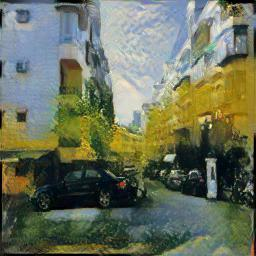|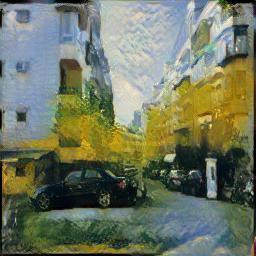| 

<b>Figure 61</b>: blended_monet2_vangogh1_30_70.jpg<br>
<b>Figure 62</b>: blended_monet2_vangogh1_20_80.jpg<br>

Higher Van Gogh 2 weights amplify the saturation, brush texture and contrast. The stylised images becomes bolder, with areas such as foliage and sky lit up in thick dabs of light. These combinations offer a more dramatic visual experience, allowing the influence of Van Gogh2’s luminous, expressionistic style to dominate.

<b> Loss Function Analysis </b> <br>
From the optimisation logs, the total loss across all Monet 2 + Van Gogh 2 runs consistently decreased over 800 steps, reflecting effective convergence of the stylisation model. The lowest final loss was achieved at Monet2's dominant configurations, with 80-20 blend having loss = 10,123 and 70-30  blend having loss = 10,072). Which suggests that Monet 2’s gentle gradients and structured lines are easier to optimise against the content image.

In contrast, Van Gogh 2's heavy blend,s with 20-80  blend having loss = 14,775 and blend having loss = 13,450, exhibited higher final losses. Likely due to the increased stylistic complexity and texture density Van Gogh introduces. The initial loss values for these runs were also significantly higher, reinforcing the idea that Van Gogh 2’s style layers impose a more intricate objective. The results reveal a trade off between aesthetic richness and optimisation difficulty—bold stylistic features are visually compelling but harder to fit into the content structure.

#### <b>9) Ninth Pairwise Combination: `monet2.jpg` + `vangogh3.jpg` </b>

In [19]:
# Step 1: Load two style images: monet2.jpg + vangogh3.jpg
style_image_1 = load_image("style_images/monet2.jpg")
style_image_2 = load_image("style_images/vangogh3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet2_vangogh3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 6823394.50
Step 100 / 800 | Total loss: 22659.58
Step 200 / 800 | Total loss: 13090.56
Step 300 / 800 | Total loss: 11025.80
Step 400 / 800 | Total loss: 10221.26
Step 500 / 800 | Total loss: 9814.97
Step 600 / 800 | Total loss: 9568.72
Step 700 / 800 | Total loss: 9408.27
Step 800 / 800 | Total loss: 9294.61
Saved: outputs/blended_monet2_vangogh3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 7992447.00
Step 100 / 800 | Total loss: 20746.30
Step 200 / 800 | Total loss: 12650.17
Step 300 / 800 | Total loss: 10825.71
Step 400 / 800 | Total loss: 10115.86
Step 500 / 800 | Total loss: 9763.64
Step 600 / 800 | Total loss: 9563.17
Step 700 / 800 | Total loss: 9431.19
Step 800 / 800 | Total loss: 9329.11
Saved: outputs/blended_monet2_vangogh3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6695112.50
Step 100 / 800 | Total loss: 25902.83
Step 200 / 800 | Total loss: 1

#### Outcome of Ninth Pairwise Combination: monet2.jpg + vangogh3.jpg <br>

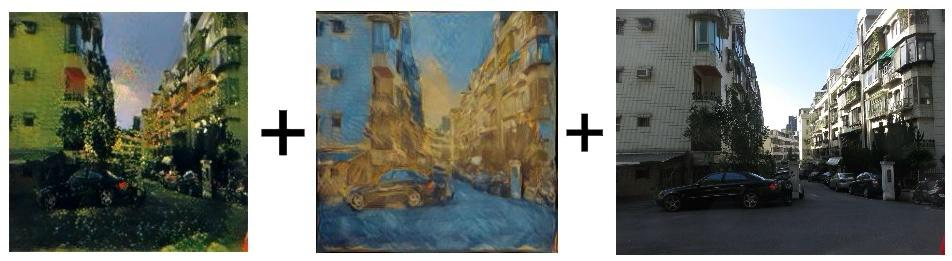<br>
<b>Figure 63:</b> single style image content image with monet2 & vangogh3 <br>

The Monet2 and Van Gogh3 blends exhibit one of the most visually engaging ranges in the dataset. 

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 2, 50% Van Gogh 3 Blend: </b> <br>
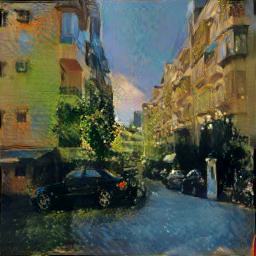<br>
<b>Figure 64</b>: blended_monet2_vangogh3_50_50.jpg<br>

At 50-50, the output is pleasantly complex. Monet 2’s gentle transitions offer a fluid backdrop while Van Gogh 3 introduces a directional energy and tonal variation. The street scapes reflect an ethereal golden hour ambiance, both grounded and expressive.

<u><b>70%-80% Monet 2 + 30%-20% Van Gogh 3</b></u> <br>


| 70-30: <br> 70% Monet 2, 30% Van Gogh 3                   | 80-20: <br> 80% Monet 2, 20% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
| 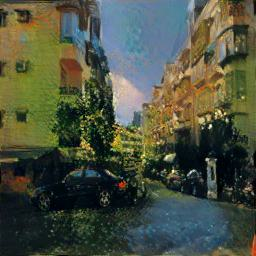|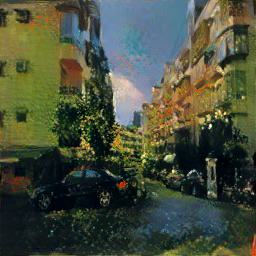 | 

<b>Figure 65</b>: blended_monet2_vangogh3_70_30.jpg<br>
<b>Figure 66</b>: blended_monet2_vangogh3_80_20.jpg<br>

With Monet 2's heavy blends, the outputs retain their atmospheric quality, but Van Gogh 3’s brushstroke dynamism is subdued. While still expressive, the visuals lean more towards spatial coherence and naturalistic lighting. The 80-20 result in particular evokes a dreamy yet realistic aesthetic, maintaining Monet 2’s compositional order.

<u><b>30%-20% Monet 2 + 70%-80% Van Gogh 2</b></u><br>

| 30-70: <br> 30% Monet 2, 70% Van Gogh 3                   | 20-80: <br> 20% Monet 2, 80% Van Gogh 3                   |
| ------------------------ | ------------------------------------ |
| 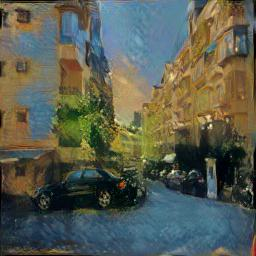|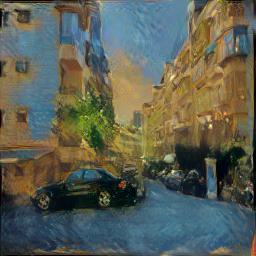| 

<b>Figure 67</b>: blended_monet2_vangogh3_30_70.jpg<br>
<b>Figure 68</b>: blended_monet2_vangogh3_20_80.jpg<br>

When Van Gogh 3 dominates, the stylisation becomes increasingly dramatic. Textures become more pronounced, lighting is exaggerated and brush patterns form a swirling motion across the image. These versions feel emotionally intense, showcasing Van Gogh3’s expressive power while pushing the boundaries of photorealism.

<b> Loss Function Analysis </b> <br>
All weight configurations between Monet 2 and Van Gogh 3 displayed smooth loss descent over 800 iterations, indicating convergence. The lowest final losses occurred for Monet2 's heavy runs, 80-20 = 9,698 and 70-30 = 9,329, reinforcing the notion that Monet’s more orderly features align better with the optimisation pipeline.

Conversely, Van Gogh 3's dominant runs such as 30-70 = 11,209 and 20-80 = 12,435 produced higher final losses, reflecting the added complexity from Van Gogh’s intense texture and abstraction. These configurations started with notably higher total losses, suggesting a more challenging stylisation process. Nonetheless, the visual rewards, such as enhanced detail and bolder contrast. Thus, justifying the computational intensity in artistic terms.

#### <b>10) Tenth Pairwise Combination: `monet3.jpg` + `vangogh1.jpg` </b>

In [20]:
# Step 1: Load two style images: monet3.jpg + vangogh1.jpg
style_image_1 = load_image("style_images/monet3.jpg")
style_image_2 = load_image("style_images/vangogh1.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet3_vangogh1_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 12130340.00
Step 100 / 800 | Total loss: 14658.57
Step 200 / 800 | Total loss: 9353.50
Step 300 / 800 | Total loss: 8348.71
Step 400 / 800 | Total loss: 7999.21
Step 500 / 800 | Total loss: 7808.68
Step 600 / 800 | Total loss: 7683.18
Step 700 / 800 | Total loss: 7598.07
Step 800 / 800 | Total loss: 7530.56
Saved: outputs/blended_monet3_vangogh1_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 13450679.00
Step 100 / 800 | Total loss: 14467.13
Step 200 / 800 | Total loss: 9509.92
Step 300 / 800 | Total loss: 8630.74
Step 400 / 800 | Total loss: 8305.38
Step 500 / 800 | Total loss: 8137.72
Step 600 / 800 | Total loss: 8031.45
Step 700 / 800 | Total loss: 7956.60
Step 800 / 800 | Total loss: 7902.84
Saved: outputs/blended_monet3_vangogh1_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 11207393.00
Step 100 / 800 | Total loss: 14986.84
Step 200 / 800 | Total loss: 9358

#### Outcome of Tenth Pairwise Combination: monet3.jpg + vangogh1.jpg <br>

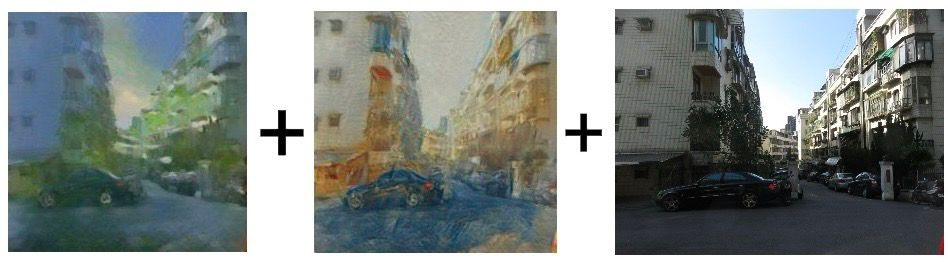<br>
<b>Figure 69:</b> single style image content image with monet3 & vangogh1 <br>

This pair blends the distinct clarity of Monet 3’s defined structure and warm afternoon glow with Van Gogh 1’s swirling intensity and impasto textures.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 3, 50% Van Gogh 1 Blend: </b> <br>
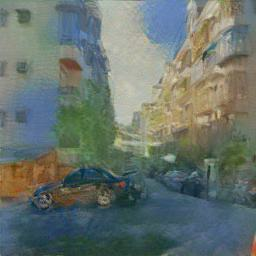<br>
<b>Figure 70</b>: blended_monet3_vangogh1_50_50.jpg<br>

The 50-50 blend strikes a delicate equilibrium, preserving clear architectural outlines while infusing them with kinetic brushwork and amber tinged highlights.

<u><b>70%-80% Monet 3 + 30%-20% Van Gogh 1</b></u> <br>


| 70-30: <br> 70% Monet 3, 30% Van Gogh 1                   | 80-20: <br> 80% Monet 3, 20% Van Gogh 1                    |
| ------------------------ | ------------------------------------ |
| 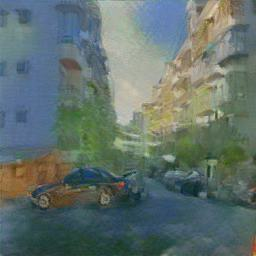 | 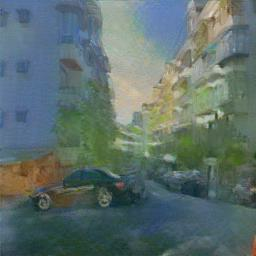 | 

<b>Figure 71</b>: blended_monet3_vangogh1_70_30.jpg<br>
<b>Figure 72</b>: blended_monet3_vangogh1_80_20.jpg<br>

The influence of Monet 3 grows more pronounced,buildings appear more grounded and luminous, with the style softening Van Gogh’s jagged contrasts. The visual tone becomes steadier with reductions in motion blur, settling into a more classical aesthetic.

<u><b>30%-20% Monet 2 + 70%-80% Van Gogh 2</b></u><br>

| 30-70: <br> 30% Monet 3, 70% Van Gogh 1                   | 20-80: <br> 20% Monet 3, 80% Van Gogh 1                   |
| ------------------------ | ------------------------------------ |
| 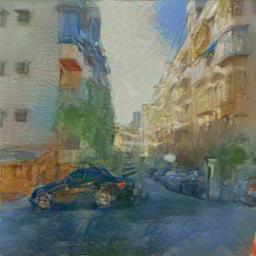| 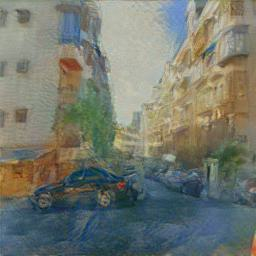| 

<b>Figure 73</b>: blended_monet3_vangogh1_30_70.jpg<br>
<b>Figure 74</b>: blended_monet3_vangogh1_20_80.jpg<br>

The Van Gogh heavy blends intensifies dynamic texture and directional strokes. Swirling patterns overlay the scenery, creating tension in the contours and amplifying expressive distortion. Van Gogh’s traits dominate windows and edges dissolve into spirals and dashes, evoking more emotion than realism.

<b> Loss Function Analysis </b> <br>
All weight configurations between Monet 3 and Van Gogh 1 displayed smooth loss descent over 800 iterations, indicating convergence. The lowest final losses were observed in the 30-70 = 7,513.83 and 50-50 = 7,530.56 configurations. This suggests that Van Gogh1’s stronger stylistic content imposes some optimization difficulty, especially when dominant. However, the relatively low variance, approximately 500, between blends implies this pair is highly compatible in texture and tone, offering graceful transitions across ratios.

#### <b>11) Eleventh Pairwise Combination: `monet3.jpg` + `vangogh2.jpg` </b>

In [21]:
# Step 1: Load two style images: monet3.jpg + vangogh2.jpg
style_image_1 = load_image("style_images/monet3.jpg")
style_image_2 = load_image("style_images/vangogh2.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet3_vangogh2_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 7660598.00
Step 100 / 800 | Total loss: 23451.63
Step 200 / 800 | Total loss: 14263.77
Step 300 / 800 | Total loss: 12582.89
Step 400 / 800 | Total loss: 11947.07
Step 500 / 800 | Total loss: 11607.26
Step 600 / 800 | Total loss: 11395.58
Step 700 / 800 | Total loss: 11241.05
Step 800 / 800 | Total loss: 11123.55
Saved: outputs/blended_monet3_vangogh2_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 9970943.00
Step 100 / 800 | Total loss: 20041.29
Step 200 / 800 | Total loss: 11767.10
Step 300 / 800 | Total loss: 10344.75
Step 400 / 800 | Total loss: 9815.85
Step 500 / 800 | Total loss: 9545.93
Step 600 / 800 | Total loss: 9388.87
Step 700 / 800 | Total loss: 9286.85
Step 800 / 800 | Total loss: 9212.59
Saved: outputs/blended_monet3_vangogh2_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6811497.00
Step 100 / 800 | Total loss: 29719.63
Step 200 / 800 | Total loss

#### Outcome of Eleventh Pairwise Combination: monet3.jpg + vangogh2.jpg <br>

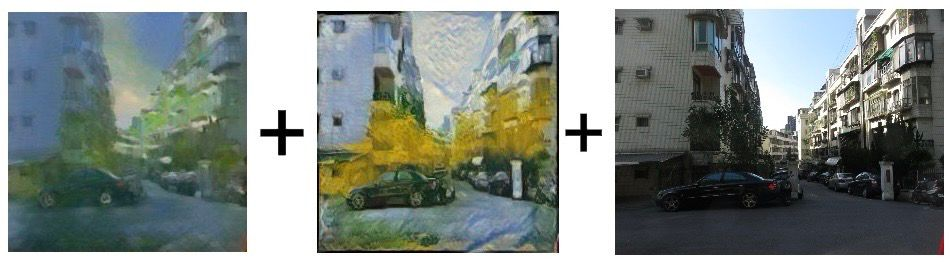<br>
<b>Figure 75:</b> single style image content image with monet3 & vangogh2 <br>

This combination brings together Monet 3’s defined forms and rich yellows with Van Gogh 2’s darker gradients and deep contrast shading.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 3, 50% Van Gogh 2 Blend: </b> <br>
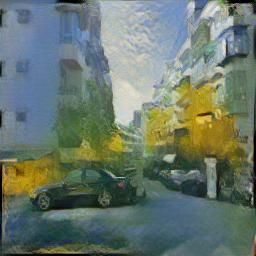<br>
<b>Figure 76</b>: blended_monet3_vangogh2_50_50.jpg<br>

In the 50-50 blend, we see balanced light dispersion with brushstrokes textured enough to animate the environment but still retaining spatial clarity.

<u><b>70%-80% Monet 3 + 30%-20% Van Gogh 2</b></u> <br>


| 70-30: <br> 70% Monet 3, 30% Van Gogh 2                   | 80-20: <br> 80% Monet 3, 20% Van Gogh 2                    |
| ------------------------ | ------------------------------------ |
|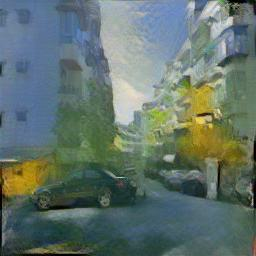| 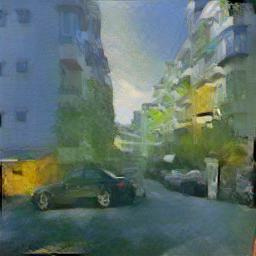 | 

<b>Figure 77</b>: blended_monet3_vangogg2_70_30.jpg<br>
<b>Figure 78</b>: blended_monet3_vangogh2_80_20.jpg<br>

The images appear brighter and cleaner, with rounded trees and more sunlight visible. The boldness of Van Gogh2’s tone softens, resulting in a tranquil but still dramatic outcome.


<u><b>30%-20% Monet 2 + 70%-80% Van Gogh 2</b></u><br>

| 30-70: <br> 30% Monet 3, 70% Van Gogh 2                   | 20-80: <br> 20% Monet 3, 80% Van Gogh 2                   |
| ------------------------ | ------------------------------------ |
| 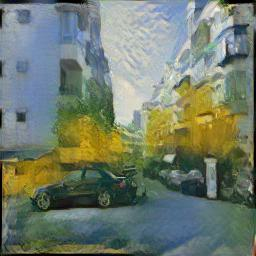 | 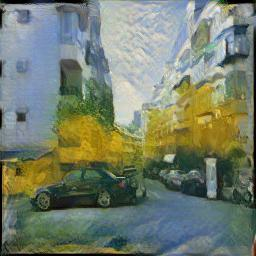| 

<b>Figure 79</b>: blended_monet3_vangogh2_30_70.jpg<br>
<b>Figure 80</b>: blended_monet3_vangogh2_20_80.jpg<br>

Here, colours deepen with shadows growing heavier, and textures gaining density. Swirls and expressive accents cause form distortion, particularly on buildings and vehicles.

<b> Loss Function Analysis </b> <br>
All weight configurations between Monet 3 and Van Gogh 2 displayed smooth loss descent over 800 iterations, indicating convergence. A clear pattern can be seen when higher Van Gogh 2 weight increases final loss, which suggests more stylistic complexity or variance from the content. Van Gogh 2’s darker colour palette and stronger contrast features require more optimisation effort, leading to a higher residual loss. The 80-20 and 70-30 blends offer the best convergence results, making them ideal candidates for stylisations that seek emotional depth without over distortion.

#### <b>12) Twelfth Pairwise Combination: `monet3.jpg` + `vangogh3.jpg` </b>

In [22]:
# Step 1: Load two style images: monet3.jpg + vangogh3.jpg
style_image_1 = load_image("style_images/monet3.jpg")
style_image_2 = load_image("style_images/vangogh3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_monet3_vangogh3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 10305079.00
Step 100 / 800 | Total loss: 18611.43
Step 200 / 800 | Total loss: 11996.49
Step 300 / 800 | Total loss: 10571.67
Step 400 / 800 | Total loss: 9992.44
Step 500 / 800 | Total loss: 9710.09
Step 600 / 800 | Total loss: 9545.05
Step 700 / 800 | Total loss: 9437.70
Step 800 / 800 | Total loss: 9359.25
Saved: outputs/blended_monet3_vangogh3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 12171133.00
Step 100 / 800 | Total loss: 17156.77
Step 200 / 800 | Total loss: 10966.35
Step 300 / 800 | Total loss: 9646.26
Step 400 / 800 | Total loss: 9144.42
Step 500 / 800 | Total loss: 8880.09
Step 600 / 800 | Total loss: 8721.80
Step 700 / 800 | Total loss: 8604.70
Step 800 / 800 | Total loss: 8519.93
Saved: outputs/blended_monet3_vangogh3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 9082267.00
Step 100 / 800 | Total loss: 22424.17
Step 200 / 800 | Total loss: 14

#### Outcome of Twelveth Pairwise Combination: monet3.jpg + vangogh3.jpg <br>

 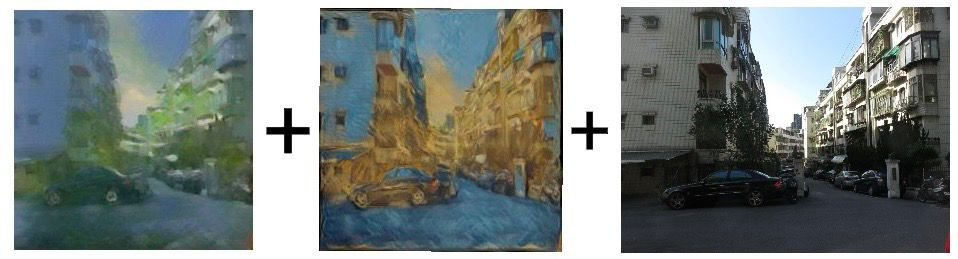 <br>
<b>Figure 81:</b> single style image content image with monet3 & vangogh3 <br>

This blend showcase a vibrant fusion of Monet 3’s warm Impressionist lighting with Van Gogh 3’s distinctive swirling textures.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Monet 3, 50% Van Gogh 3 Blend: </b> <br>
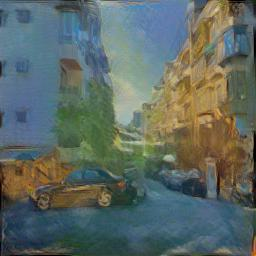<br>
<b>Figure 82</b>: blended_monet3_vangogh3_50_50.jpg<br>

At the 50-50 weight, the stylised image is richly detailed and balanced with the warmth of Monet 3’s brushwork layered over Van Gogh 3’s energetic strokes. The scene glows with golden tones, especially along building edges and skies.

<u><b>70%-80% Monet 3 + 30%-20% Van Gogh 3</b></u> <br>


| 70-30: <br> 70% Monet 3, 30% Van Gogh 3                   | 80-20: <br> 80% Monet 3, 20% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
|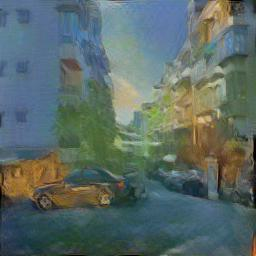| 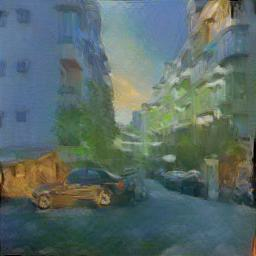 | 

<b>Figure 83</b>: blended_monet3_vangogh3_70_30.jpg<br>
<b>Figure 84</b>: blended_monet3_vangogh3_80_20.jpg<br>

As Monet 3’s weight increases, the images display smoother tonal transitions and subdued movement. The golden highlight remains, but is softened, giving a luminous and serene effect. This is particularly seen in the 80-20 blend where fine details appear smudged and calm.


<u><b>30%-20% Monet 3 + 70%-80% Van Gogh 3</b></u><br>

| 30-70: <br> 30% Monet 3, 70% Van Gogh 3                   | 20-80: <br> 20% Monet 3, 80% Van Gogh 3                   |
| ------------------------ | ------------------------------------ |
| 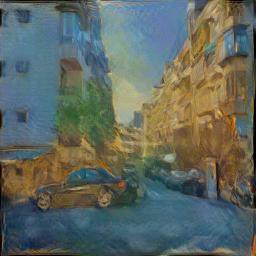 | 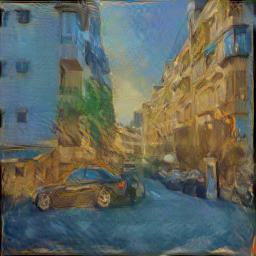| 

<b>Figure 85</b>: blended_monet3_vangogh3_30_70.jpg<br>
<b>Figure 86</b>: blended_monet3_vangogh3_20_80.jpg<br>

Conversely, when Van Gogh 3 is weighted more heavily, the texture becomes bolder and more erratic. Curving strokes dominate the skies and building edges, suggesting heightened dynamism and tension. These versions exhibit an expressive flair, almost leaning into abstraction.


<b> Loss Function Analysis </b> <br>
All weight configurations between Monet 3 and Van Gogh 3 showed a consistent convergence across 800 steps. The lowest final losses were observed at 80-20 = 8,258.75 and 70-30 = 8,519.93), where Monet’s smoother forms allowed quicker optimisation. The highest final losses occurred with more Van Gogh 3 influence, 20-80 = 12,600.07, likely due to the intricate swirl textures challenging alignment with the content. The balanced 50-50 blend yielded a respectable loss of 9,359.25, demonstrating good optimisation and aesthetic quality.

#### <b>13) Thirteenth Pairwise Combination: `vangogh1.jpg` + `vangogh2.jpg` </b>

In [23]:
# Step 1: Load two style images: vangogh1.jpg + vangogh2.jpg
style_image_1 = load_image("style_images/vangogh1.jpg")
style_image_2 = load_image("style_images/vangogh2.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_vangogh1_vangogh2_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 6484761.00
Step 100 / 800 | Total loss: 26291.31
Step 200 / 800 | Total loss: 14418.79
Step 300 / 800 | Total loss: 12189.20
Step 400 / 800 | Total loss: 11404.78
Step 500 / 800 | Total loss: 11032.18
Step 600 / 800 | Total loss: 10802.84
Step 700 / 800 | Total loss: 10647.96
Step 800 / 800 | Total loss: 10542.35
Saved: outputs/blended_vangogh1_vangogh2_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 7412940.50
Step 100 / 800 | Total loss: 20720.64
Step 200 / 800 | Total loss: 11302.83
Step 300 / 800 | Total loss: 9546.52
Step 400 / 800 | Total loss: 8920.16
Step 500 / 800 | Total loss: 8615.01
Step 600 / 800 | Total loss: 8430.96
Step 700 / 800 | Total loss: 8301.71
Step 800 / 800 | Total loss: 8210.79
Saved: outputs/blended_vangogh1_vangogh2_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6496781.50
Step 100 / 800 | Total loss: 31190.45
Step 200 / 800 | Total l

#### Outcome of Thirteenth Pairwise Combination: vangogh1.jpg + vangogh2.jpg <br>

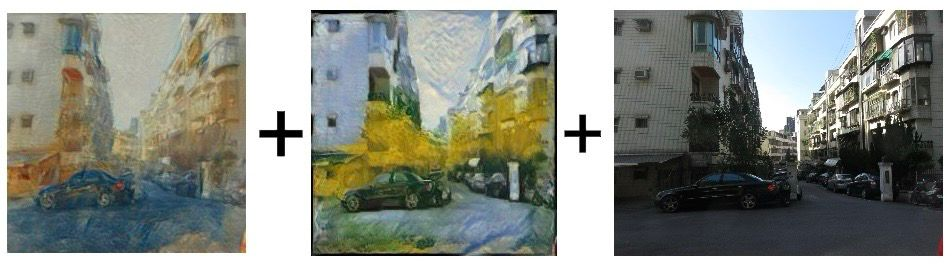 <br>
<b>Figure 87:</b> single style image content image with vangogh1 & vangogh2 <br>

This combination blends two emotionally charged styles from Van Gogh, resulting in dramatic shifts in texture and intensity.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Van Gogh 1, 50% Van Gogh 2 Blend: </b> <br>
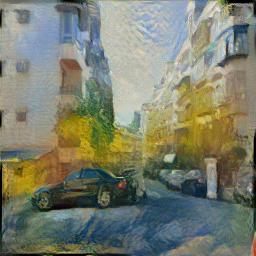<br>
<b>Figure 88</b>: blended_vangogh1_vangogh2_50_50.jpg<br>

The 50-50 blend appears vibrant and atmospheric, layering Van Gogh 1’s expressive color contrast with Van Gogh 2’s bold outlines.

<u><b>70%-80% Van Gogh 1 + 30%-20% Van Gogh 2</b></u> <br>


| 70-30: <br> 70% Van Gogh 1, 30% Van Gogh 2                   | 80-20: <br> 80% Van Gogh 1, 20% Van Gogh 2                    |
| ------------------------ | ------------------------------------ |
|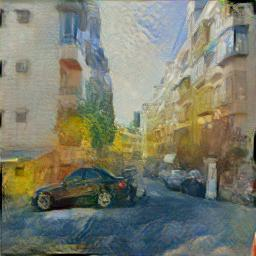| 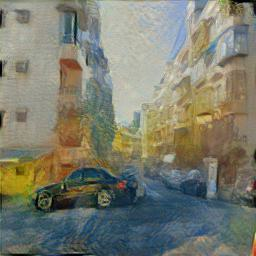 | 

<b>Figure 89</b>: blended_vangogh1_vangogh2_70_30.jpg<br>
<b>Figure 90</b>: blended_vangogh1_vangogh2_80_20.jpg<br>

Being Van Gogh 1 dominant, the images exhibits smoother shading, less turbulent strokes and better structure definition. In particular, the sky and vehicle contours.

<u><b>30%-20% Van Gogh 1 + 70%-80% Van Gogh 3</b></u><br>

| 30-70: <br> 30% Van Gogh 1, 70% Van Gogh 2                   | 20-80: <br> 20% Van Gogh 1, 80% Van Gogh 2                   |
| ------------------------ | ------------------------------------ |
|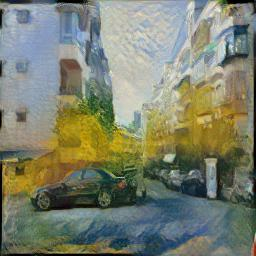 | 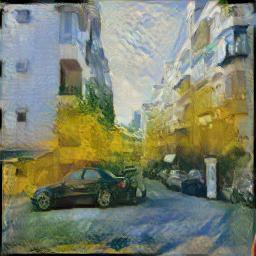| 

<b>Figure 91</b>: blended_vangogh1_vangogh2_30_70.jpg<br>
<b>Figure 92</b>: blended_vangogh1_vangogh2_20_80.jpg<br>

When Van Gogh 2 takes over, the scene is overtaken by swirling textures, heavy saturation and dramatic lighting. These results push into abstraction, making form recognition harder but style more pronounced.


<b> Loss Function Analysis </b> <br>
The lowest final losses were observed in high Van Gogh 1 weightings, 80-20 = 7,907.59 and 70-30 = 8,210.79, as Van Gogh 1’s more structured texture facilitated better optimisation. Higher Van Gogh 2 weightings increased the final loss, peaking at 14,620.36 for the 20-80 blend. The 50-50 setting showed stable convergence with final loss of 10,542.35, indicating good compatibility between the two. Loss patterns were typical, but highly influenced by Van Gogh2’s complexity.

#### <b>14) Fourteenth Pairwise Combination: `vangogh1.jpg` + `vangogh3.jpg` </b>

In [24]:
# Step 1: Load two style images: vangogh1.jpg + vangogh3.jpg
style_image_1 = load_image("style_images/vangogh1.jpg")
style_image_2 = load_image("style_images/vangogh3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_vangogh1_vangogh3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 8576344.00
Step 100 / 800 | Total loss: 19665.45
Step 200 / 800 | Total loss: 11960.48
Step 300 / 800 | Total loss: 10385.03
Step 400 / 800 | Total loss: 9829.98
Step 500 / 800 | Total loss: 9547.56
Step 600 / 800 | Total loss: 9373.83
Step 700 / 800 | Total loss: 9250.94
Step 800 / 800 | Total loss: 9162.98
Saved: outputs/blended_vangogh1_vangogh3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 9148695.00
Step 100 / 800 | Total loss: 16940.71
Step 200 / 800 | Total loss: 10174.18
Step 300 / 800 | Total loss: 8901.12
Step 400 / 800 | Total loss: 8441.83
Step 500 / 800 | Total loss: 8225.18
Step 600 / 800 | Total loss: 8093.57
Step 700 / 800 | Total loss: 8004.56
Step 800 / 800 | Total loss: 7937.42
Saved: outputs/blended_vangogh1_vangogh3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 8303116.00
Step 100 / 800 | Total loss: 22626.82
Step 200 / 800 | Total loss: 

#### Outcome of Fourteenth Pairwise Combination: vangogh1.jpg + vangogh3.jpg <br>

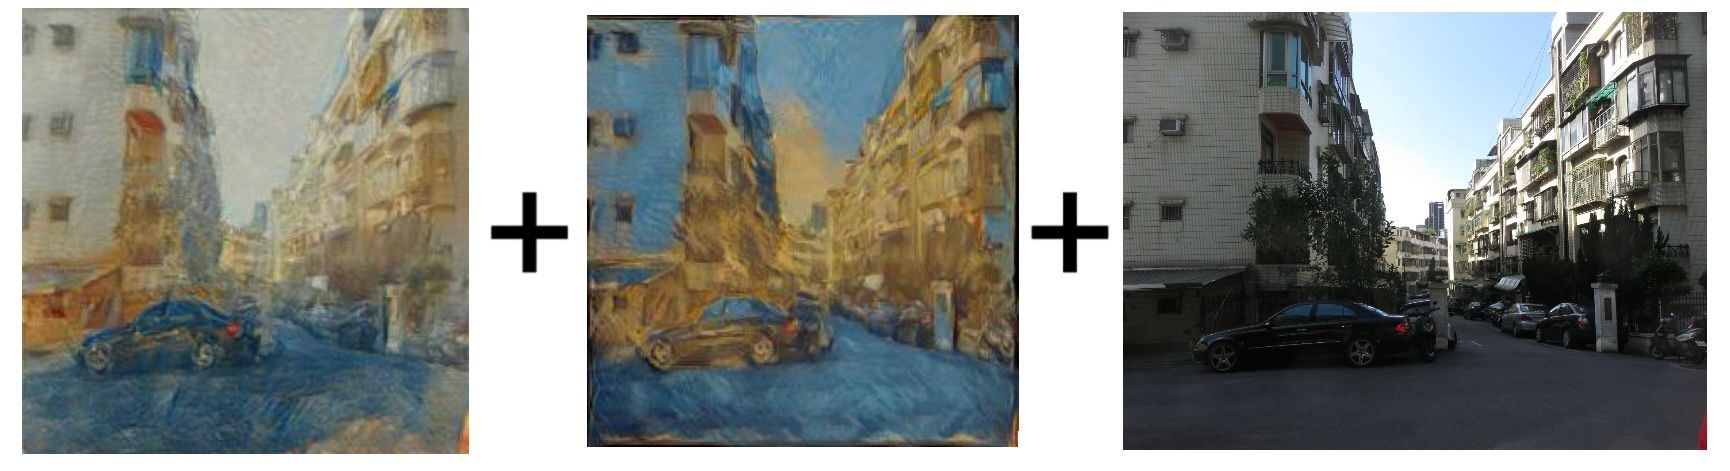 <br>
<b>Figure 93:</b> single style image content image with vangogh1 & vangogh3 <br>

The blending of Van Gogh 1 and Van Gogh 3 results in a stylised scene rich in texture and emotional intensity. 

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Van Gogh 1, 50% Van Gogh 3 Blend: </b> <br>
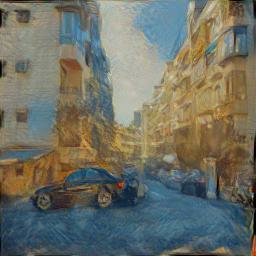 <br>
<b>Figure 94</b>: blended_vangogh1_vangogh3_50_50.jpg<br>

At the 50-50 blend, there is a vibrant yet controlled balance. The swirling textures and electric blues from Van Gogh 1 combined with the radiant gold and linear strokes from Van Gogh 3, creates a dynamic but harmonious composition. The sky exhibits a sense of movement, while the architectural edges remain expressive but legible.


<u><b>70%-80% Van Gogh 1 + 30%-20% Van Gogh 3</b></u> <br>


| 70-30: <br> 70% Van Gogh 1, 30% Van Gogh 3                   | 80-20: <br> 80% Van Gogh 1, 20% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
| 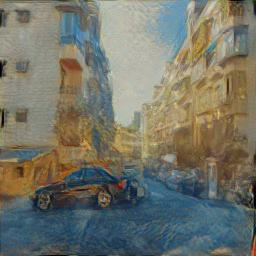| 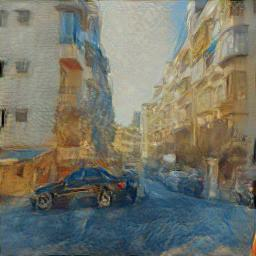 | 

<b>Figure 95</b>: blended_vangogh1_vangogh3_70_30.jpg<br>
<b>Figure 96</b>: blended_vangogh1_vangogh3_80_20.jpg<br>

As Van Gogh 1’s weight increases, the blue and indigo palette deepens. Brush strokes become more fluid and circular, lending a strong post impressionist motion to the sky and shadows. In the 80-20 image, Van Gogh 3’s warm gold are nearly overwhelmed by the cooler stormier tones, resulting in a more nocturnal or melancholic atmosphere.


<u><b>30%-20% Van Gogh 1 + 70%-80% Van Gogh 3</b></u><br>

| 30-70: <br> 30% Van Gogh 1, 70% Van Gogh 3                   | 20-80: <br> 20% Van Gogh 1, 80% Van Gogh 3                   |
| ------------------------ | ------------------------------------ |
| 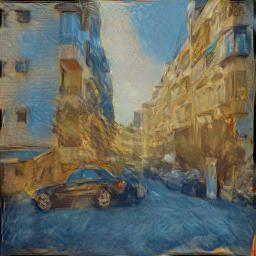| 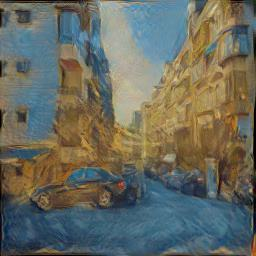| 

<b>Figure 97</b>: blended_vangogh1_vangogh3_30_70.jpg<br>
<b>Figure 98</b>: blended_vangogh1_vangogh3_20_80.jpg<br>

Conversely, when Van Gogh 3 dominates, golden light floods the scene. Linear highlights, particularly on the building edges, become more pronounced. These versions lean toward clarity and warmth, showing less of Van Gogh 1’s iconic turbulence and more architectural control. The mood becomes brighter and more structured, evoking a sunlit city view rather than an emotional swirl.


<b> Loss Function Analysis </b> <br>
The training logs indicate consistent convergence for this pair. The lowest final losses occurred at Van Gogh 1 heavy blend where 80-20 = 7697.92 and 70-30: 7937.42. These low losses suggest that Van Gogh 1’s features are easier to align with the content image, likely due to stronger abstract coherence in his style layers. Blends with higher Van Gogh 3 weight of 30-70 and 20-80 settle at higher losses like 11295.83 and 13060.15 respectively.
This supports the interpretation that Van Gogh 3 introduces more intricate, high-frequency textures and color variance, making optimisation more demanding.

#### <b>15) Fifteenth Pairwise Combination: `vangogh2.jpg` + `vangogh3.jpg` </b>

In [25]:
# Step 1: Load two style images: vangogh2.jpg + vangogh3.jpg
style_image_1 = load_image("style_images/vangogh2.jpg")
style_image_2 = load_image("style_images/vangogh3.jpg")

# Step 2: Extract style features from both style images
style_features_1 = get_features(style_image_1, vgg, style_layers)
style_features_2 = get_features(style_image_2, vgg, style_layers)

# Step 3: Compute and blend Gram matrices using fixed weights (50/50),(70/30),(30/70),(80/20),(20/80)
# List of weight combinations (style1_weight, style2_weight)
weight_pairs = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7), (0.8, 0.2), (0.2, 0.8)]

# For each weight pair, generate a stylised output
for w1, w2 in weight_pairs:
    print(f"\nBlending Style 1 ({w1}) + Style 2 ({w2})")

    # Step 3.1: Blend style gram matrices
    blended_grams = {
        layer: w1 * gram_matrix(style_features_1[layer]) + w2 * gram_matrix(style_features_2[layer])
        for layer in style_layers
    }

    # Step 3.2: Re-initialize target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 3.3: Define optimizer
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 3.4: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                blended_gram = blended_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - blended_gram) ** 2)
                style_loss += layer_loss / (target_features[layer].shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"Step {step_count[0]} / {steps} | Total loss: {total_loss.item():.2f}")

            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 4: Save each image with descriptive filename
    final_image = target.clone().detach().squeeze(0).cpu()
    final_image = unnormalize(final_image).clamp(0, 1)
    filename = f"outputs/blended_vangogh2_vangogh3_{int(w1*100)}_{int(w2*100)}.jpg"
    save_image(final_image, filename)
    print(f"Saved: {filename}")


Blending Style 1 (0.5) + Style 2 (0.5)
Step 0 / 800 | Total loss: 6603199.50
Step 100 / 800 | Total loss: 30245.09
Step 200 / 800 | Total loss: 19384.00
Step 300 / 800 | Total loss: 16937.97
Step 400 / 800 | Total loss: 16083.06
Step 500 / 800 | Total loss: 15654.90
Step 600 / 800 | Total loss: 15406.82
Step 700 / 800 | Total loss: 15237.10
Step 800 / 800 | Total loss: 15107.35
Saved: outputs/blended_vangogh2_vangogh3_50_50.jpg

Blending Style 1 (0.7) + Style 2 (0.3)
Step 0 / 800 | Total loss: 6849943.50
Step 100 / 800 | Total loss: 35318.44
Step 200 / 800 | Total loss: 21269.63
Step 300 / 800 | Total loss: 18273.00
Step 400 / 800 | Total loss: 17122.54
Step 500 / 800 | Total loss: 16524.78
Step 600 / 800 | Total loss: 16209.59
Step 700 / 800 | Total loss: 15994.75
Step 800 / 800 | Total loss: 15844.80
Saved: outputs/blended_vangogh2_vangogh3_70_30.jpg

Blending Style 1 (0.3) + Style 2 (0.7)
Step 0 / 800 | Total loss: 6920523.50
Step 100 / 800 | Total loss: 28522.31
Step 200 / 800 | T

#### Outcome of Fifteenth Pairwise Combination: vangogh2.jpg + vangogh3.jpg <br>

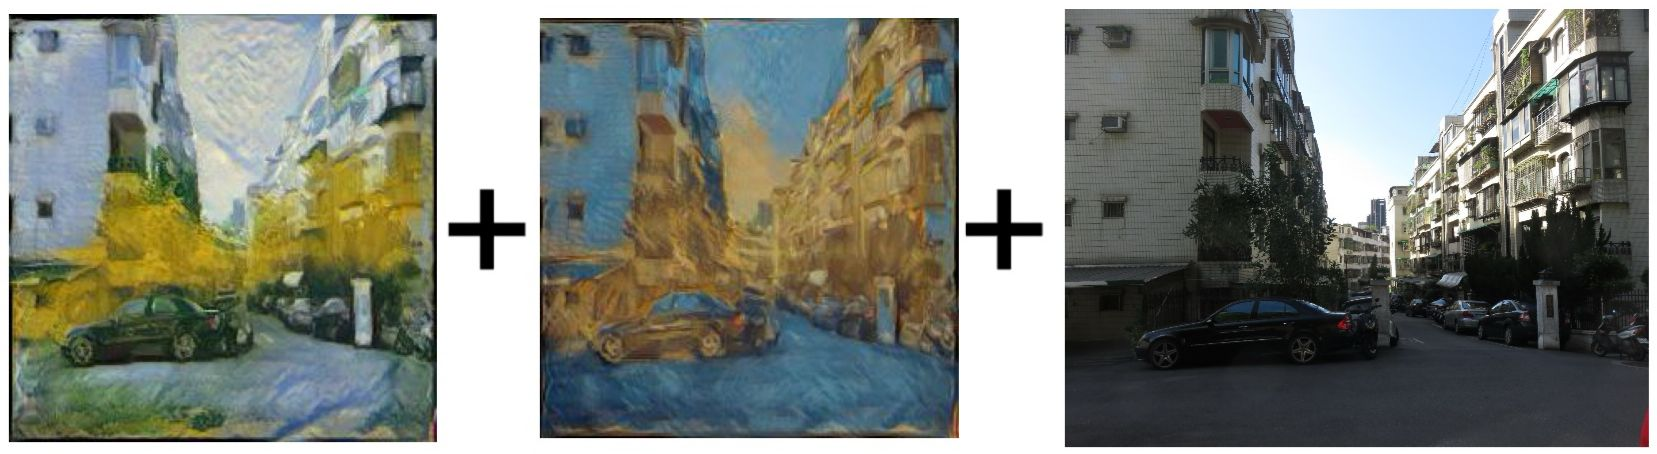 <br>
<b>Figure 99:</b> single style image content image with vangogh2 & vangogh3 <br>

The blending of Van Gogh 2 and Van Gogh 3 pairing produces some of the most energetic stylisations.

<u><b>[Baseline]</b></u> <br>
<b>50-50: 50% Van Gogh 2, 50% Van Gogh 3 Blend: </b> <br>
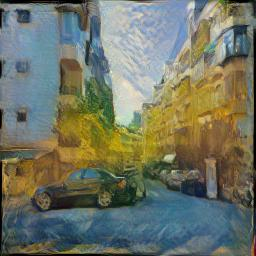<br>
<b>Figure 100</b>: blended_vangogh2_vangogh3_50_50.jpg<br>

At 50-50, there is a vivid interplay of fiery yellows and bold brush lines. The image gains a pronounced sense of illumination and movement, with expressive texture flow across buildings and foliage.


<u><b>70%-80% Van Gogh 2 + 30%-20% Van Gogh 3</b></u> <br>


| 70-30: <br> 70% Van Gogh 2, 30% Van Gogh 3                   | 80-20: <br> 80% Van Gogh 2, 20% Van Gogh 3                    |
| ------------------------ | ------------------------------------ |
| 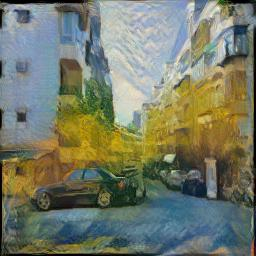| 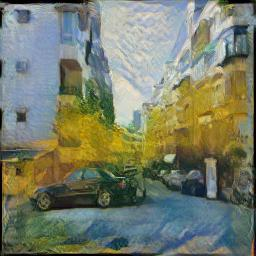 | 

<b>Figure 101</b>: blended_vangogh2_vangogh3_70_30.jpg<br>
<b>Figure 102</b>: blended_vangogh2_vangogh3_80_20.jpg<br>

Increasing Van Gogh 2’s weight resulted in more dynamic skies and contrast heavy composition. These versions exhibit swirling motion and bolder texture transitions, particularly in foliage and shadow areas, creating a slightly chaotic but highly stylised feel.

<u><b>30%-20% Van Gogh 2 + 70%-80% Van Gogh 3</b></u><br>

| 30-70: <br> 30% Van Gogh 2, 70% Van Gogh 3                   | 20-80: <br> 20% Van Gogh 2, 80% Van Gogh 3                   |
| ------------------------ | ------------------------------------ |
| 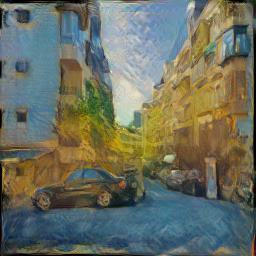| 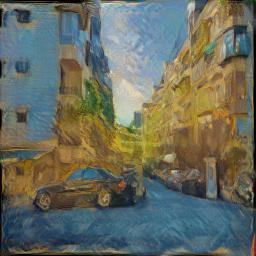| 

<b>Figure 103</b>: blended_vangogh2_vangogh3_30_70.jpg<br>
<b>Figure 104</b>: blended_vangogh2_vangogh3_20_80.jpg<br>

In contrast, Van Gogh 3 heavy blends offer greater structure and color layering. Brush lines become sharper and slightly more rigid. Warmth dominates, but some of the swirls from Van Gogh 2 remain in the clouds and trees, softening the overall intensity.

<b> Loss Function Analysis </b> <br>
This pairing shows overall higher final losses, likely due to both styles contributing complex stroke directions and intense color shifts. The final losses had a lowest score at 50-50 with 15107.35 and highest of 80-20 = 16568.15 at the Van Gogh 2 heavy blend. All configurations converge, but the residual losses suggest high residual style error when both styles are highly textured. The trade off here reflects a challenge in balancing strong stylistic identities—each layer pulling the optimisation in different directions.

## 7. Final Loss Analysis Across Pairwise Style Combinations

In this section, we analyse the final loss values obtained from the optimization process across the 15 pairwise style blends using varying weight ratios. The objective is to evaluate how blending ratios affect convergence and whether lower loss values correspond to visually pleasing outputs.

This analysis includes:
- Line plots visualizing loss trends across blending ratios
- Bar charts highlighting the lowest loss achieved per pair
- Interpretations of observed loss behaviors and their relation to stylistic similarity

This helps us understand the effectiveness of multi-style blending from both a quantitative and qualitative perspective.

### 7.1 Overview of Dataset and Approach
The final loss values used in this analysis were recorded at the end of 800 optimisation iterations for each style blend. Each style pair was tested across five different weight configurations: <br>

<b> Style 1 : Style 2 </b> 
- 0.2 / 0.8 
- 0.3 / 0.7
- 0.5 / 0.5
- 0.7 / 0.3
- 0.8 / 0.2

This produced a total of 75 data points (15 style pairs × 5 weight settings). Loss values were extracted from the training logs, compiled into a CSV file `All_15_Pairwise_Final_Losses.csv`, and analysed using Python visualisation tools.

In [2]:
import pandas as pd

# Load collected style loss results CSV file
df = pd.read_csv("All_15_Pairwise_Final_Losses.csv")
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style Pair      75 non-null     object 
 1   Style 1 Weight  75 non-null     float64
 2   Style 2 Weight  75 non-null     float64
 3   Final Loss      75 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.5+ KB


Style Pair  Style 1 Weight  Style 2 Weight  Final Loss
0     monet1 + monet2             0.5             0.5     7521.76
1     monet1 + monet2             0.7             0.3     7287.88
2     monet1 + monet2             0.3             0.7     8875.37
3     monet1 + monet2             0.8             0.2     7785.09
4     monet1 + monet2             0.2             0.8     9822.73
5     monet1 + monet3             0.5             0.5     9088.63
6     monet1 + monet3             0.7             0.3     9597.70
7     monet1 + monet3             0.3             0.7     9105.82
8     monet1 + monet3             0.8             0.2     9579.56
9     monet1 + monet3             0.2             0.8     9224.56
10  monet1 + vangogh1             0.5             0.5     7586.19
11  monet1 + vangogh1             0.7             0.3     8029.05
12  monet1 + vangogh1             0.3             0.7     7357.76
13  monet1 + vangogh1             0.8             0.2     8433.84
14  monet1 + vangogh1             0.2             0.8     7524.26

Based on the data analysis preview above, it has been confirmed that the data is complete with no nulls and are consistently formatted. This structured dataset provides us a solid basis for quantitative analysis, enabling comparison accross style pairs and weight ratios.

### 7.2. Line Plot of Final Loss vs. Style Weight
The line plots in this section provides a detailed view of how the final loss values vary with changes in Style 1 weight for each of the 15 style blend pairings. By examining these trends collectively, we get to identify the recurring patterns, anormalies and performance clusters.

<b>Why Only Style 1's Weight Was Used For Analysis?</b> <br>
Since Style 2's weight is simply the complement of Style 1's weight (e.g., if Style 1's weight = 0.7, then Style 2's weight = 0.3), analysing both would be redundant. Using Style 1's weight provides a single, clear axis to observe how changing blend proportions influences the final loss.

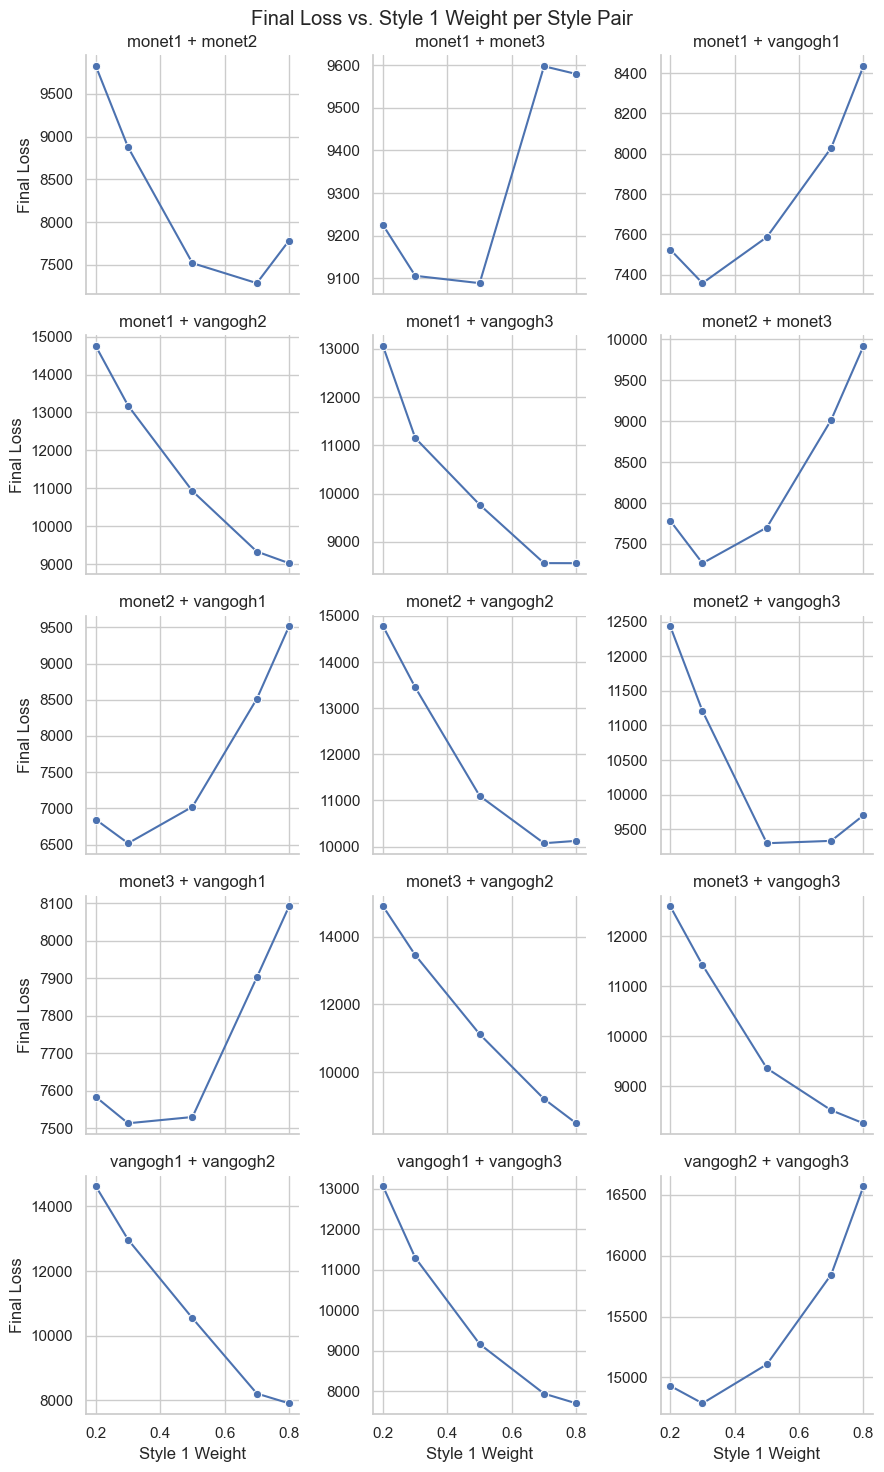

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Theme for cleaner visuals
sns.set(style="whitegrid")

# Each subplot is one style pair
g = sns.FacetGrid(df, col="Style Pair", col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x="Style 1 Weight", y="Final Loss", marker="o")

# Labels
g.set_titles("{col_name}")
g.set_axis_labels("Style 1 Weight", "Final Loss")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Final Loss vs. Style 1 Weight per Style Pair")
plt.tight_layout()
plt.show()

#### Key Obeservations
1. **Steady Decline in Loss with Increasing Style 1 Weight** <br>
Several pairings, notably `vangogh1 + vangogh2` and `vangogh1 + vangogh3`, demonstrate a consistent decrease in final loss as Style 1 weight increases. This suggests that when these particular Style 1 images dominate the blend, optimisation proceeds more smoothly and converges to lower loss values. Such trends may indicate that Style 1 contains structural or textural features that the network can more easily model compared to Style 2.

2. **U-Shaped Trends** <br>
Some pairs like `monet1 + monet3` and `vangogh2 + vangogh3`, showing <b>U-shaped curves</b> have lower losses at the extremes, 0.2 and 0.8, with higher losses at immediate weights, 0.5.
This behaviour implies that the model struggles when tasked with balancing both styles equally but converges more efficiently when one style clearly dominates. It is possible that conflicting high-frequency features between these style images cause optimisation interference when weights are balanced.
 
3. **Minimal Loss Variability** <br>
A few pairs, like `monet3 + vangogh1`, show relatively *flat loss curves*, meaning changes in weight proportion have minimal effect on final loss. This stability suggests the two styles have compatible feature structures, allowing the network to adapt without significant optimisation cost regardless of blend ratio.

4. **Asymmetrical Sensitivity to Weighting** <br>
In some cases, loss values change sharply with a small shift in Style 1 weight on one side of the scale but remain stable on the other. For example: <br>
    - `monet2 + vangogh1` sees rapid loss reduction when increasing Style 1 weight from 0.2 to 0.5, after which improvements plateau.
    - `monet1 + vangogh3` experiences most of its loss reduction when Style 1 weight is decreased toward 0.2.
This asymmetry suggests that one of the styles exerts a disproportionately large influence on optimisation quality.

5. **High-Loss Outliers** <br>
Combinations like `monet1 + vangogh2` and `vangogh2 + vangogh3` consistently yield higher loss values across most weightings, often exceeding 14,000. These results indicate substantial complexity or incompatibility between the chosen styles, potentially due to differences in spatial composition, brushstroke density, or colour distribution.


**Interpretation:** <br>
This trend analysis not only identifies which pairings achieve the lowest losses but also explains why certain weightings work better. For educational purposes, these findings help demonstrate that optimal style blending is not always about equal mixing — in fact, strongly favouring one style can often produce both more visually coherent and computationally efficient results.

### 7.3 Lowest Final Loss Per Pair
This bar chart ranks each style pair by **its lowest observed final loss** across all weight combinations.

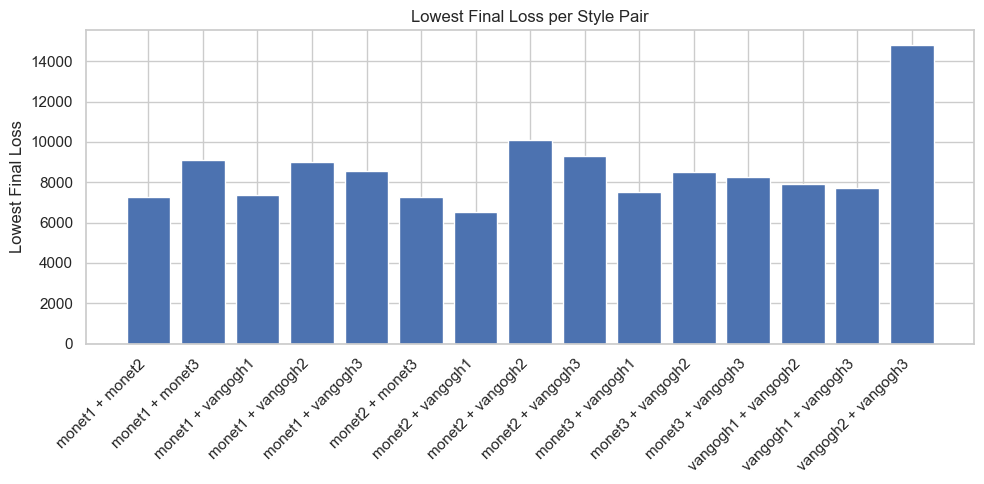

In [4]:
min_losses = df.groupby("Style Pair")["Final Loss"].min().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(min_losses["Style Pair"], min_losses["Final Loss"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Lowest Final Loss")
plt.title("Lowest Final Loss per Style Pair")
plt.tight_layout()
plt.show()

#### Key Observations:

1. **Lowest Loss Overall:** <br>
`monet2 + vangogh1` shows the smallest minimum final loss (6517.56), indicating strong compatibility between these styles in optimisation.
3. **Highest Loss Overall:** <br>
`vangogh2 + vangogh3` records the largest minimum final loss (16568.15), implying high difficulty in converging when these two styles are combined.
4. **Monet Combinations:** <br>
Most Monet pairings yield relatively low minimum losses, supporting the idea that their brushwork and colour structures are computationally more compatible.
5. **Van Gogh Combinations:**  <br>
Pure Van Gogh pairings tend to have higher losses, likely due to their strong textural complexity and high-frequency features.

**Interpretation:**
This view makes it clear which pairings are more "loss-efficient" and which are more computationally challenging. In a practical sense, this can help recommend style pairings that are both artistically interesting and stable for educational demonstrations.


### 7.4 Heatmap Of Final Losses Across All Style Pairs And Weights

The heatmap provides us a condensed visual representation of how the final loss value varies across all 15 style blended pairing and five different Style 1 weights (20%, 30%, 50%, 70% and 80%). Colour intensity reflects magnitude, with darker blue cells indicating higher losses and lighter yellow-green cells indicating lower losses.

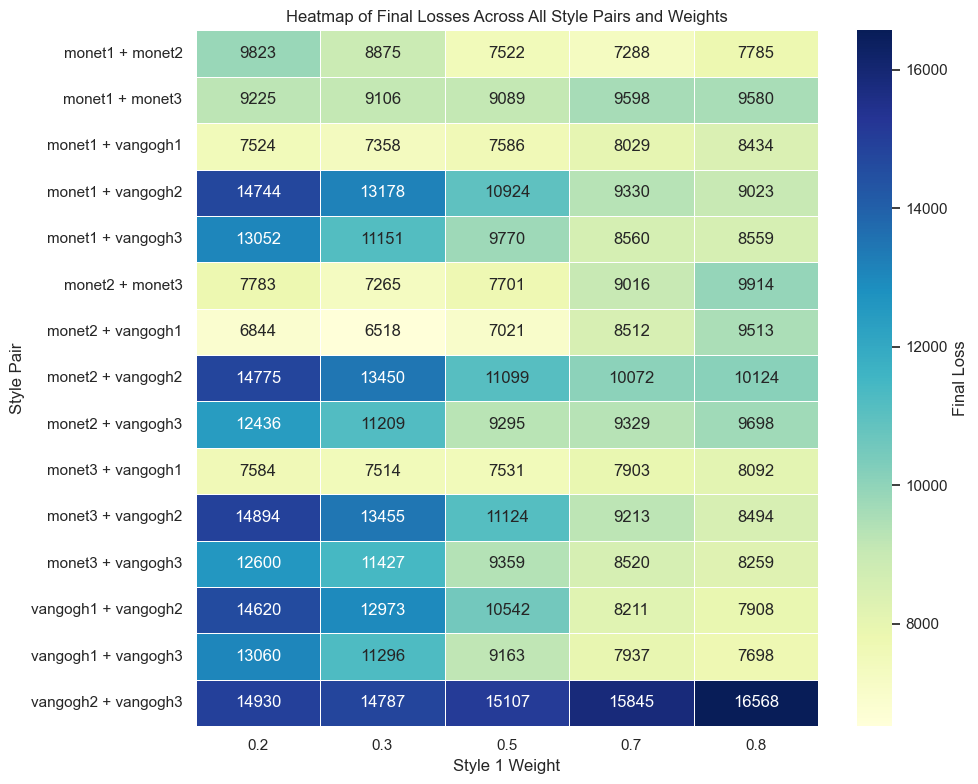

In [5]:
# Create pivot table for heatmap
pivot_table = df.pivot_table(index="Style Pair", columns="Style 1 Weight", values="Final Loss")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Final Loss'})
plt.title("Heatmap of Final Losses Across All Style Pairs and Weights")
plt.xlabel("Style 1 Weight")
plt.ylabel("Style Pair")
plt.tight_layout()
plt.show()

#### Key Obeservations
Based on the outcome of our heatmp shown above, these are the four main observations made:
1. **Consistently Low Loss Zones** <br>
Pairings such as `monet1 + monet2`, `monet1 + monet3`, `monet1 + vangogh1`, `monet2 + monet3`, `monet2 + vangogh1`, and `monet3 + vangogh1` display multiple light-coloured cells in the heatmap, signalling stable and low final losses across several style-weight configurations. These combinations maintain relatively low optimisation costs regardless of the exact blending ratio, suggesting higher style compatibility. This stability stem from shared visual feature, particularly among Monet variations and vangogh1. Such as, similar brushstroke textures, harmonious colour palettes and balanced edge definitions, which allow the network to converge more efficiently during the style transfer process.
   
3. **High Loss Pairings** <br>
Combinations like `monet1 + vangogh2`, `monet2 + vangogh2`, and `vangogh2 + vangogh3` contain multiple dark blue cells, especially at extreme weights of 0.2 and 0.8, with final losses often exceeding 14,000. These pairings involve highly distinct feature maps, making it difficult for the optimiser to reconcile their differences.

4. **Effect of Style Weight** <br>
For many pairs, the lowest losses appear at intermediate weights (0.3–0.7), indicating that moderate blending can aid convergence. However, some combinations—such as `monet3 + vangogh2 `and `vangogh2 + vangogh3`, perform better when heavily skewed towards one style, suggesting that dominance of one feature set can simplify optimisation.

5. **Best Performing Pair Weight Combinations** <br>
The absolute lowest loss in the dataset occurs for `monet2 + vangogh1` at 0.3 weight 6517.56, followed closely by `monet2 + monet3` at 0.3 weight 7265.05. These results reinforce that optimal performance is not tied to a specific universal weight but is highly dependent on style compatibility.

### 7.5 Conclusion
The analysis done in this chapter, highlights the final loss trend varyingn betweeen different style pairs, with no one-size-fits-all blending ratio guarenteed optimal convergence.

From the plots shown in section 7.2 and 7.3, we observed four primary behaviours:
1. Consistent decline in loss with increased Style 1 dominace
2. U-shaped or inverted U-shaped responses to blending
3. Minimal sensitivity to weight shifts in certain stable pairings
4. Strong asymmetrical responses where one style exerts greater influences

The heatmap shown in section 7.4 consolidated these findings by making cross-combination comparisons intuitive. It revealed distinct clusters of low-loss combinations, mainly involving `vangogh1` and `monet2`, while also flagging persistent high-loss pairings, especially those involving `vangogh2`.

In conclusion, style compatibility is the single most important factor in optimisation efficiency, with harmonious texture and colour distributions yielding lower losses. Equal weight blends, 0.5/50%, are not inherently optimal, in many cases, skewing towards one style improves convergence. The findings in the chapter aligns with educationl objectives by demonstrating that neural optimisation is sensitive to feature map alignment, a core concept in understanding NST.

## 8. Interactive Blender

This chapter turns the system from a static pipeline that was done above, into an interactive learning tool. Instead of hard‑coding blend ratios and re‑running optimisation, you get to explore style interpolation by adjusting style weights and instantly viewing the corresponding stylised image. Pedagogically, this exposes how Gram‑matrix style representations combine in practice and how weight choices modulate colour, texture and stroke statistics in the output.

### 8.1 Asset Discovery and Pair Indexing
To allow smooth interaction without re-running the neural style transder for every slider change, we first discover precomputed images and build a lookup table, keyed by style pair and weight. This keeps the interactive experience responsive and reproducible, while preserving the settings used in prior changes. However, for this chapter, we will save our outputs to a new folder so as to prevent out previous outputs from being overriden.

In [1]:
import os, re, glob
from IPython.display import display, clear_output

# Where previously rendered/output blended images is
output_folder = "outputs"

# Regex to parse filename convention
fname_re = re.compile(
    r"^blended_(?P<s1>[A-Za-z0-9]+)_(?P<s2>[A-Za-z0-9]+)_(?P<w1>\d{1,3})_(?P<w2>\d{1,3})\.jpg$"
)

# Build an index: { 'monet1 + vangogh2': {0.7: 'path/to.jpg', ... }, ... } 
pair_to_weights = {}

for path in glob.glob(os.path.join(output_folder, "*.jpg")):
    name = os.path.basename(path)
    m = fname_re.match(name)
    if not m:
        continue
    s1, s2 = m.group("s1"), m.group("s2")
    w1p, w2p = int(m.group("w1")), int(m.group("w2"))
    
    # Convert percent in filename back to decimal weight
    w1 = round(w1p / 100.0, 3)
    
    # Build the human-readable pair label, consistent with your report
    pair_label = f"{s1} + {s2}"
    pair_to_weights.setdefault(pair_label, {})[w1] = os.path.join(output_folder, name)

# Small sanity check
if not pair_to_weights:
    print("No matching images found in 'outputs'. Check the directory and file naming.")
else:
    print(f"Discovered {sum(len(v) for v in pair_to_weights.values())} images "
          f"across {len(pair_to_weights)} style pairs.")

Discovered 75 images across 15 style pairs.


#### What this section does:
Previous output style blended images was scanned and a lookup table mapping was built. `style_pair`, `weight` -> `image_path` This ensures that our interactive widget knows what style pais and weight combinations exists. 

`glob` and regex was used to parse filenames and stored into a dictionary for quick access.

### 8.2 Helper Display Function
This section creates the function that is the “showcase” part of our interactive tool. When you pick a style pair and a style weight, it looks up the matching image in our catalog and displays it. If there is no exact match for the chosen weight, it automatically finds the closest available one so the interface never breaks. The image is presented neatly with titles and captions using Matplotlib, and the cell output is cleared first so each update feels smooth and seamless. At this stage, the function is purely about showing results. It doesn’t have dropdowns or sliders yet, but it’s the key building block that those interactive controls will call on later.

In [2]:
from PIL import Image
import ipywidgets as widgets
import matplotlib.pyplot as plt

# A dedicated output area so we don't wipe the widgets themselves
img_out = widgets.Output()

def _nearest_available_weight(pair_label: str, requested_w: float) -> float:
    """Return the nearest available weight for a given pair."""
    weights = sorted(pair_to_weights.get(pair_label, {}).keys())
    if not weights:
        return requested_w
    return min(weights, key=lambda w: abs(w - requested_w))

def show_image(pair_label: str, w1: float):
    """
    Render the image for a (pair, weight) into the img_out area.
    If exact weight is missing, the nearest available weight is used.
    """
    # Guard rails
    if pair_label not in pair_to_weights:
        with img_out:
            img_out.clear_output(wait=True)
            print(f"Pair '{pair_label}' not found in index.")
        return

    weights = pair_to_weights[pair_label]
    if w1 not in weights:
        used_w = _nearest_available_weight(pair_label, w1)
        exact = False
    else:
        used_w = w1
        exact = True

    path = weights.get(used_w)
    if not path or not os.path.exists(path):
        with img_out:
            img_out.clear_output(wait=True)
            print(f"No file for {pair_label} @ w1={used_w:.2f}")
        return

    with img_out:
        img_out.clear_output(wait=True)
        img = Image.open(path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{pair_label}  |  w₁={used_w:.2f}, w₂={1-used_w:.2f}", fontsize=14)
        plt.show()
        note = "" if exact else f"  (nearest to requested {w1:.2f})"
        print(os.path.basename(path) + note)

# Show the output area
img_out

Output()

### 8.3 Interactive Controls: Dropdown & Weight Slider
In this section, we assemble the interactive blender, having a style-pair dropdown and a style 1 weight slider, using ipywidgets. Changing either control refreshes the display with corresponding precomputed outlook. A small **Play** control can auto cycle through weights to demonstrate gradual style interpolation.

In [3]:
def weights_for(pair_label: str):
    return sorted(pair_to_weights.get(pair_label, {}).keys())

# build options
pair_options = sorted(pair_to_weights.keys())
default_pair = pair_options[0] if pair_options else None
default_weights = weights_for(default_pair) if default_pair else [0.2, 0.3, 0.5, 0.7, 0.8]
default_w = default_weights[0] if default_weights else 0.5

pair_dd = widgets.Dropdown(
    options=pair_options,
    value=default_pair,
    description="Style Pair:",
    layout=widgets.Layout(width="360px")
)

w_slider = widgets.SelectionSlider(
    options=default_weights,
    value=default_w,
    description="Style 1 w:",
    continuous_update=True,   # update while dragging
    layout=widgets.Layout(width="360px")
)

# Play control to animate across available weights
play = widgets.Play(
    value=0, min=0, max=max(0, len(default_weights)-1), step=1, interval=700
)
idx = widgets.IntSlider(min=0, max=max(0, len(default_weights)-1), step=1, readout=False)
widgets.jslink((play, "value"), (idx, "value"))

def on_pair_change(change):
    if change["name"] != "value":
        return
    new_pair = change["new"]
    opts = weights_for(new_pair) or [0.2, 0.3, 0.5, 0.7, 0.8]
    # Update slider + play/index ranges
    w_slider.options = opts
    w_slider.value = opts[0]
    idx.max = len(opts)-1
    play.max = len(opts)-1
    # render
    show_image(new_pair, w_slider.value)

def on_weight_change(change):
    if change["name"] != "value":
        return
    show_image(pair_dd.value, change["new"])

def on_index_change(change):
    if change["name"] != "value" or not w_slider.options:
        return
    i = max(0, min(change["new"], len(w_slider.options)-1))
    # setting slider.value triggers on_weight_change -> show_image
    w_slider.value = w_slider.options[i]

pair_dd.observe(on_pair_change, names="value")
w_slider.observe(on_weight_change, names="value")
idx.observe(on_index_change, names="value")

# First render
if default_pair is not None:
    show_image(default_pair, default_w)

# Layout
controls = widgets.HBox([pair_dd, w_slider])
bar = widgets.HBox([play])
ui = widgets.VBox([controls, bar, img_out])

display(ui)

#### How to Play With It?
1. Select the style pair blended image you want in the dropdown.
2. Click on the **Play** button to see the changes in the image as the weightage changes.
3. You can also adjust your weightage in the slider as you wish.
4. Click on the **Loop** button to observe the changes for as long as you wish.
5. Click on the **Pause** button if you wish to stop it.
6. Click on the **Stop** button if you wish to reset image to original weightage.

<br>
This chapter is an interactive user interface built with Jupyter ipywidgets. The interface combines three main elements: a dropdown menu for selecting style pairs, a slider for adjusting style weights, and a play button for animating transitions across the available weights. These controls are linked via observer functions, ensuring that any user interaction immediately updates the displayed output image. The result is a flexible tool for exploring artistic style transitions in real time, as seen above. This enables both learners and educators to experiment freely with the aesthetic spectrum between multiple styles.

# Appendix A:

Single Styled Images of `monet2.jpg`,`monet3.jpg`, `vangogh1.jpg`,`vangogh2.jpg`,`vangogh3.jpg`

Single style image was applied with `monet1.jpg` in <b>4. Stylisation Process and Optimisation</b>

In [26]:
# List of all style image filenames
style_images = [
    "monet2.jpg", "monet3.jpg",
    "vangogh1.jpg", "vangogh2.jpg", "vangogh3.jpg"
]

# Loop through each style image and perform NST
for style_name in style_images:
    print(f"\nStylising with: {style_name}")

    # Step 1: Load and extract features from the style image
    style = load_image(f"style_images/{style_name}")
    style_features = get_features(style, vgg, style_layers)

    # Step 2: Compute Gram matrices for the style image
    style_grams = {
        layer: gram_matrix(style_features[layer])
        for layer in style_layers
    }

    # Step 3: Initialise target image
    target = content_image.clone().requires_grad_(True).to(device)

    # Step 4: Define optimiser
    optimizer = torch.optim.LBFGS([target])
    steps = 800
    step_count = [0]

    # Step 5: Optimisation loop
    while step_count[0] <= steps:
        def closure():
            optimizer.zero_grad()
            target_features = get_features(target, vgg, content_layers + style_layers)

            # Content loss
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            # Style loss
            style_loss = 0
            for layer in style_layers:
                target_gram = gram_matrix(target_features[layer])
                style_gram = style_grams[layer]
                layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
                style_loss += layer_loss / (target_gram.shape[1] ** 2)

            total_loss = content_weight * content_loss + style_weight * style_loss
            total_loss.backward()

            if step_count[0] % 100 == 0:
                print(f"  Step {step_count[0]} / {steps} | Loss: {total_loss.item():.2f}")
            step_count[0] += 1
            return total_loss

        optimizer.step(closure)

    # Step 6: Unnormalize and save the final image
    final_image = unnormalize(target.clone().detach().squeeze(0).cpu()).clamp(0, 1)
    output_name = f"outputs/stylised_{style_name[:-4]}.jpg"
    save_image(final_image, output_name)
    print(f"Saved: {output_name}")


Stylising with: monet2.jpg
  Step 0 / 800 | Loss: 11697473.00
  Step 100 / 800 | Loss: 25705.54
  Step 200 / 800 | Loss: 16352.54
  Step 300 / 800 | Loss: 14188.80
  Step 400 / 800 | Loss: 13266.68
  Step 500 / 800 | Loss: 12778.07
  Step 600 / 800 | Loss: 12493.93
  Step 700 / 800 | Loss: 12308.33
  Step 800 / 800 | Loss: 12175.92
Saved: outputs/stylised_monet2.jpg

Stylising with: monet3.jpg
  Step 0 / 800 | Loss: 16176297.00
  Step 100 / 800 | Loss: 15698.05
  Step 200 / 800 | Loss: 11118.91
  Step 300 / 800 | Loss: 10167.23
  Step 400 / 800 | Loss: 9786.79
  Step 500 / 800 | Loss: 9595.81
  Step 600 / 800 | Loss: 9477.27
  Step 700 / 800 | Loss: 9391.38
  Step 800 / 800 | Loss: 9328.38
Saved: outputs/stylised_monet3.jpg

Stylising with: vangogh1.jpg
  Step 0 / 800 | Loss: 10568080.00
  Step 100 / 800 | Loss: 16142.38
  Step 200 / 800 | Loss: 10183.37
  Step 300 / 800 | Loss: 9039.81
  Step 400 / 800 | Loss: 8581.05
  Step 500 / 800 | Loss: 8328.67
  Step 600 / 800 | Loss: 8166.32


## References

Gatys, L.A., Ecker, A.S. and Bethge, M. (2016) ‘Image style transfer using
convolutional neural networks’, Proceedings of the IEEE Conference on
Computer Vision and Pattern Recognition (CVPR), pp. 2414–2423.

He, K., Zhang, X., Ren, S. and Sun, J. (2016) ‘Deep residual learning for
image recognition’, Proceedings of the IEEE Conference on Computer Vision
and Pattern Recognition, pp. 770–778.

Simonyan, K. and Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. [online] arXiv.org. Available at: https://arxiv.org/abs/1409.1556.

### Image Credits
#### Claude Monet (Public Domain)
* Monet, C. (1872). *Impression, Sunrise*. \[online] Wikimedia Commons. Available at: [https://commons.wikimedia.org/w/index.php?curid=23750619](https://commons.wikimedia.org/w/index.php?curid=23750619) \[Accessed 20 May 2025].

* Monet, C. (1867). *Jeanne-Marguerite Lecadre in the Garden Sainte-Adresse*. \[online] Wikimedia Commons via arthermitage.org. Available at: [https://commons.wikimedia.org/w/index.php?curid=155850](https://commons.wikimedia.org/w/index.php?curid=155850) \[Accessed 20 May 2025].

* Monet, C. (1899). *Water Lilies, Evening Effect*. \[online] WikiArt. Available at: [https://www.wikiart.org/en/claude-monet/water-lilies-evening-effect-1899](https://www.wikiart.org/en/claude-monet/water-lilies-evening-effect-1899) \[Accessed 20 May 2025].

---

#### Vincent van Gogh (Public Domain)

* Van Gogh, V. (1887–1888). *Self-Portrait as a Painter*. \[online] Van Gogh Museum. Available at: [https://www.vangoghmuseum.nl/en/collection/s0022V1962](https://www.vangoghmuseum.nl/en/collection/s0022V1962) \[Accessed 20 May 2025].

* Van Gogh, V. (1889). *Wheat Field with Cypresses*. \[online] The Metropolitan Museum of Art. Available at: [https://www.metmuseum.org/art/collection/search/436535](https://www.metmuseum.org/art/collection/search/436535) \[Accessed 20 May 2025].

* Van Gogh, V. (1887). *Sunflowers*. \[online] The Metropolitan Museum of Art. Available at: [https://www.metmuseum.org/art/collection/search/436524?who=Gogh%2c+Vincent+van%24Vincent+van+Gogh\&ao=on\&ft=\*\&offset=0\&rpp=20\&pos=4](https://www.metmuseum.org/art/collection/search/436524?who=Gogh%2c+Vincent+van%24Vincent+van+Gogh&ao=on&ft=*&offset=0&rpp=20&pos=4) \[Accessed 20 May 2025].

  
